In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-16T09:40:22.275344+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn   : 0.13.2
teeplot   : 1.4.2
matplotlib: 3.9.2
numpy     : 2.1.2
pandas    : 2.2.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-04-vanillasingle-mut-screen"
teeplot_subdir


'2025-05-04-vanillasingle-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/7p2qk/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
df["tb_stat"].unique()


['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']
Categories (7, object): ['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']

In [10]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [11]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=2_000, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 1080/1080 [01:49<00:00,  9.90it/s]


In [12]:
data = pd.DataFrame(records)


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


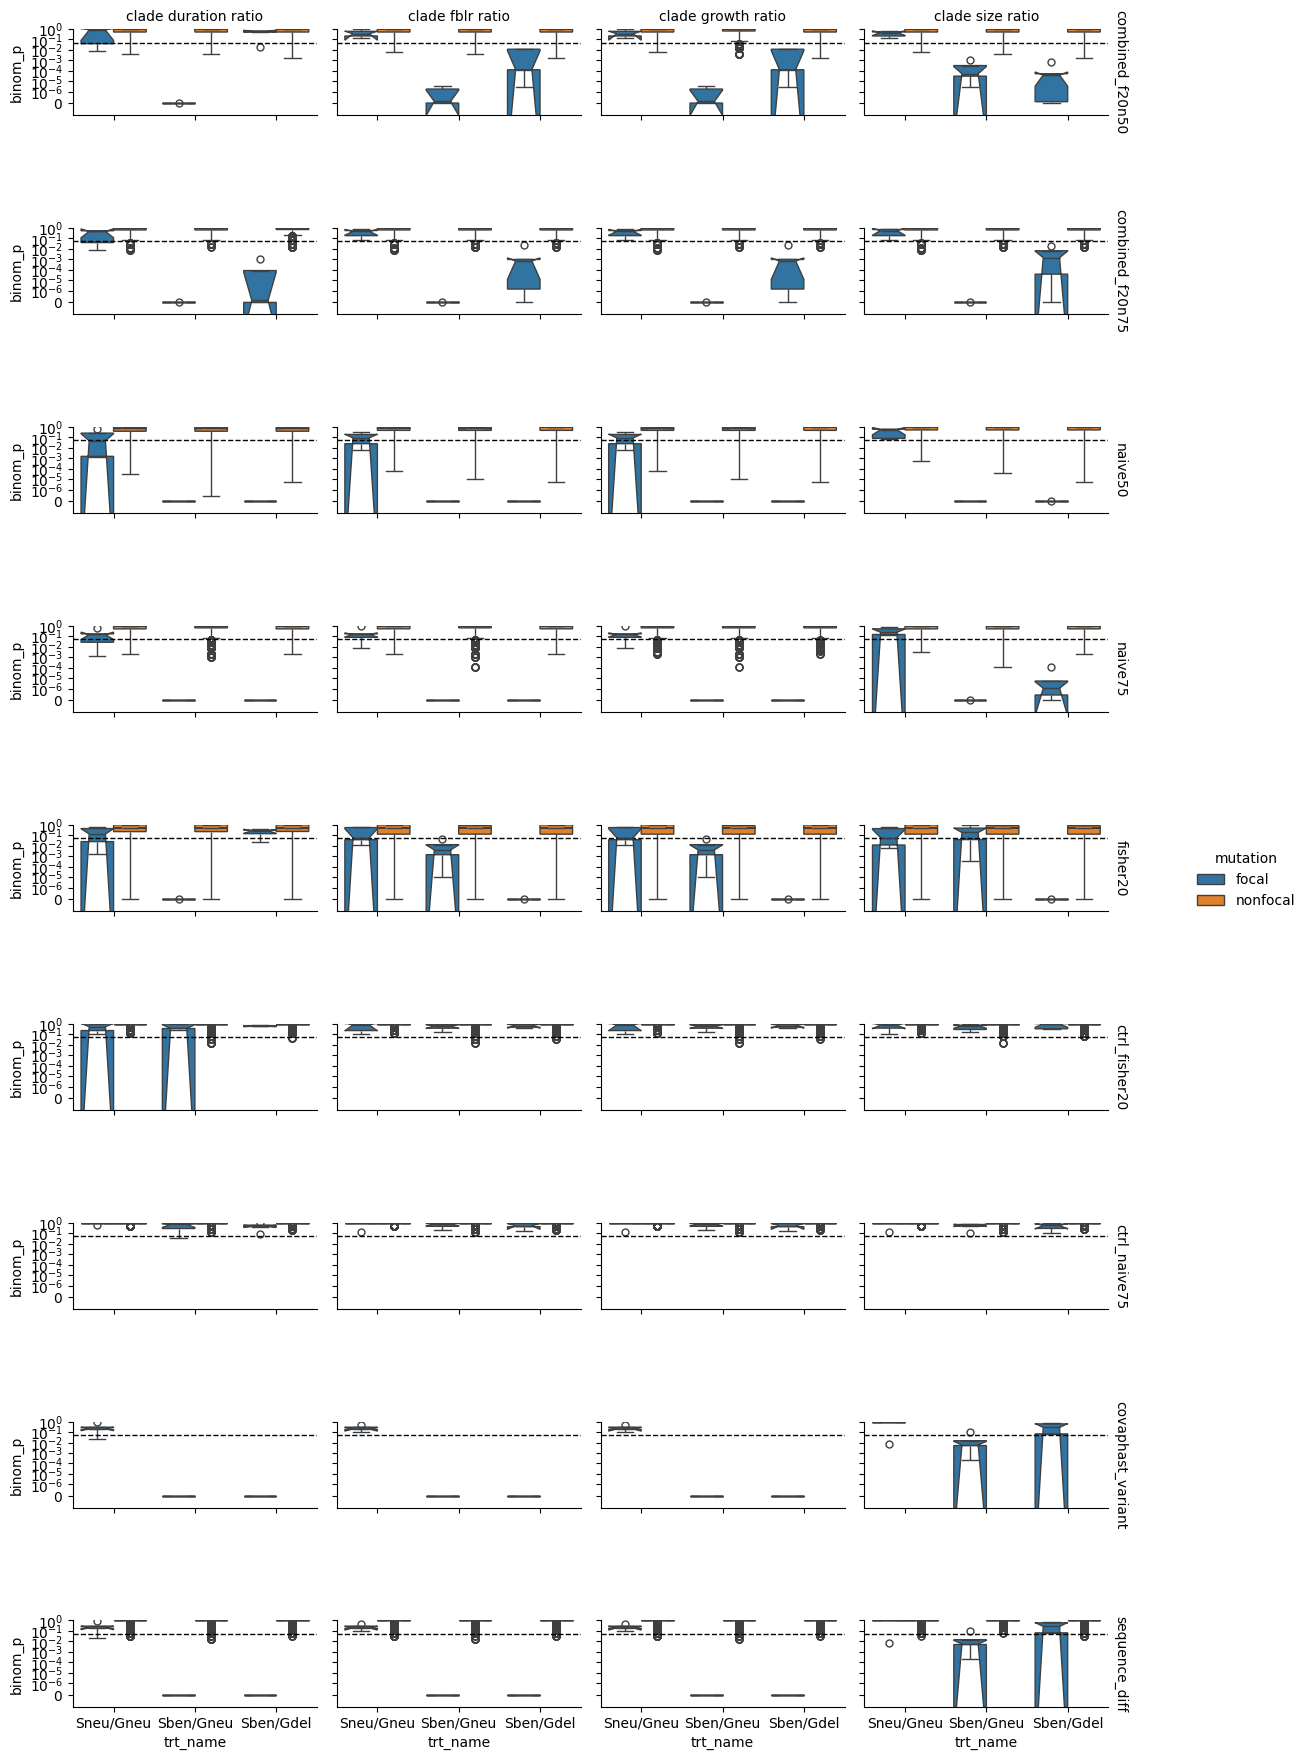

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


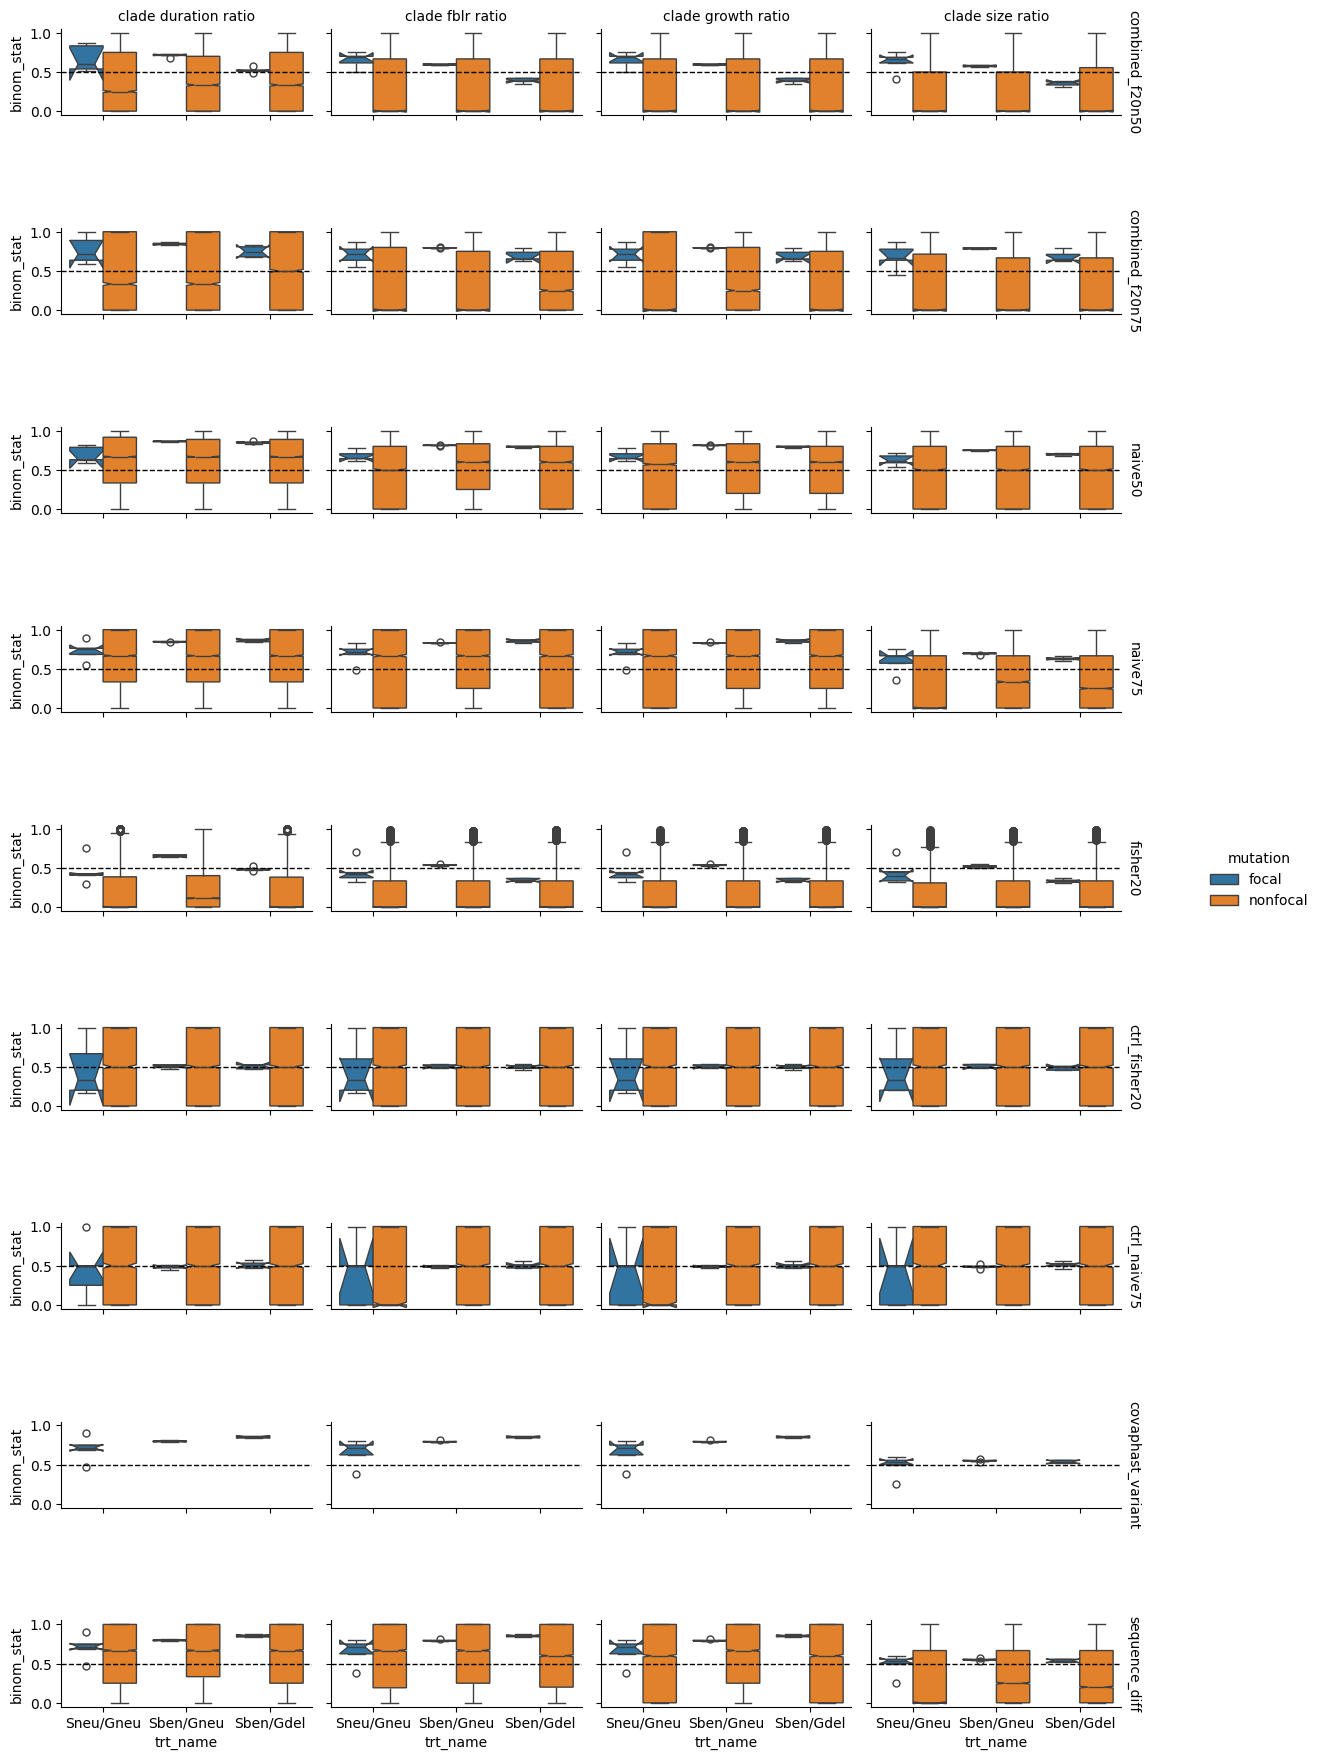

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


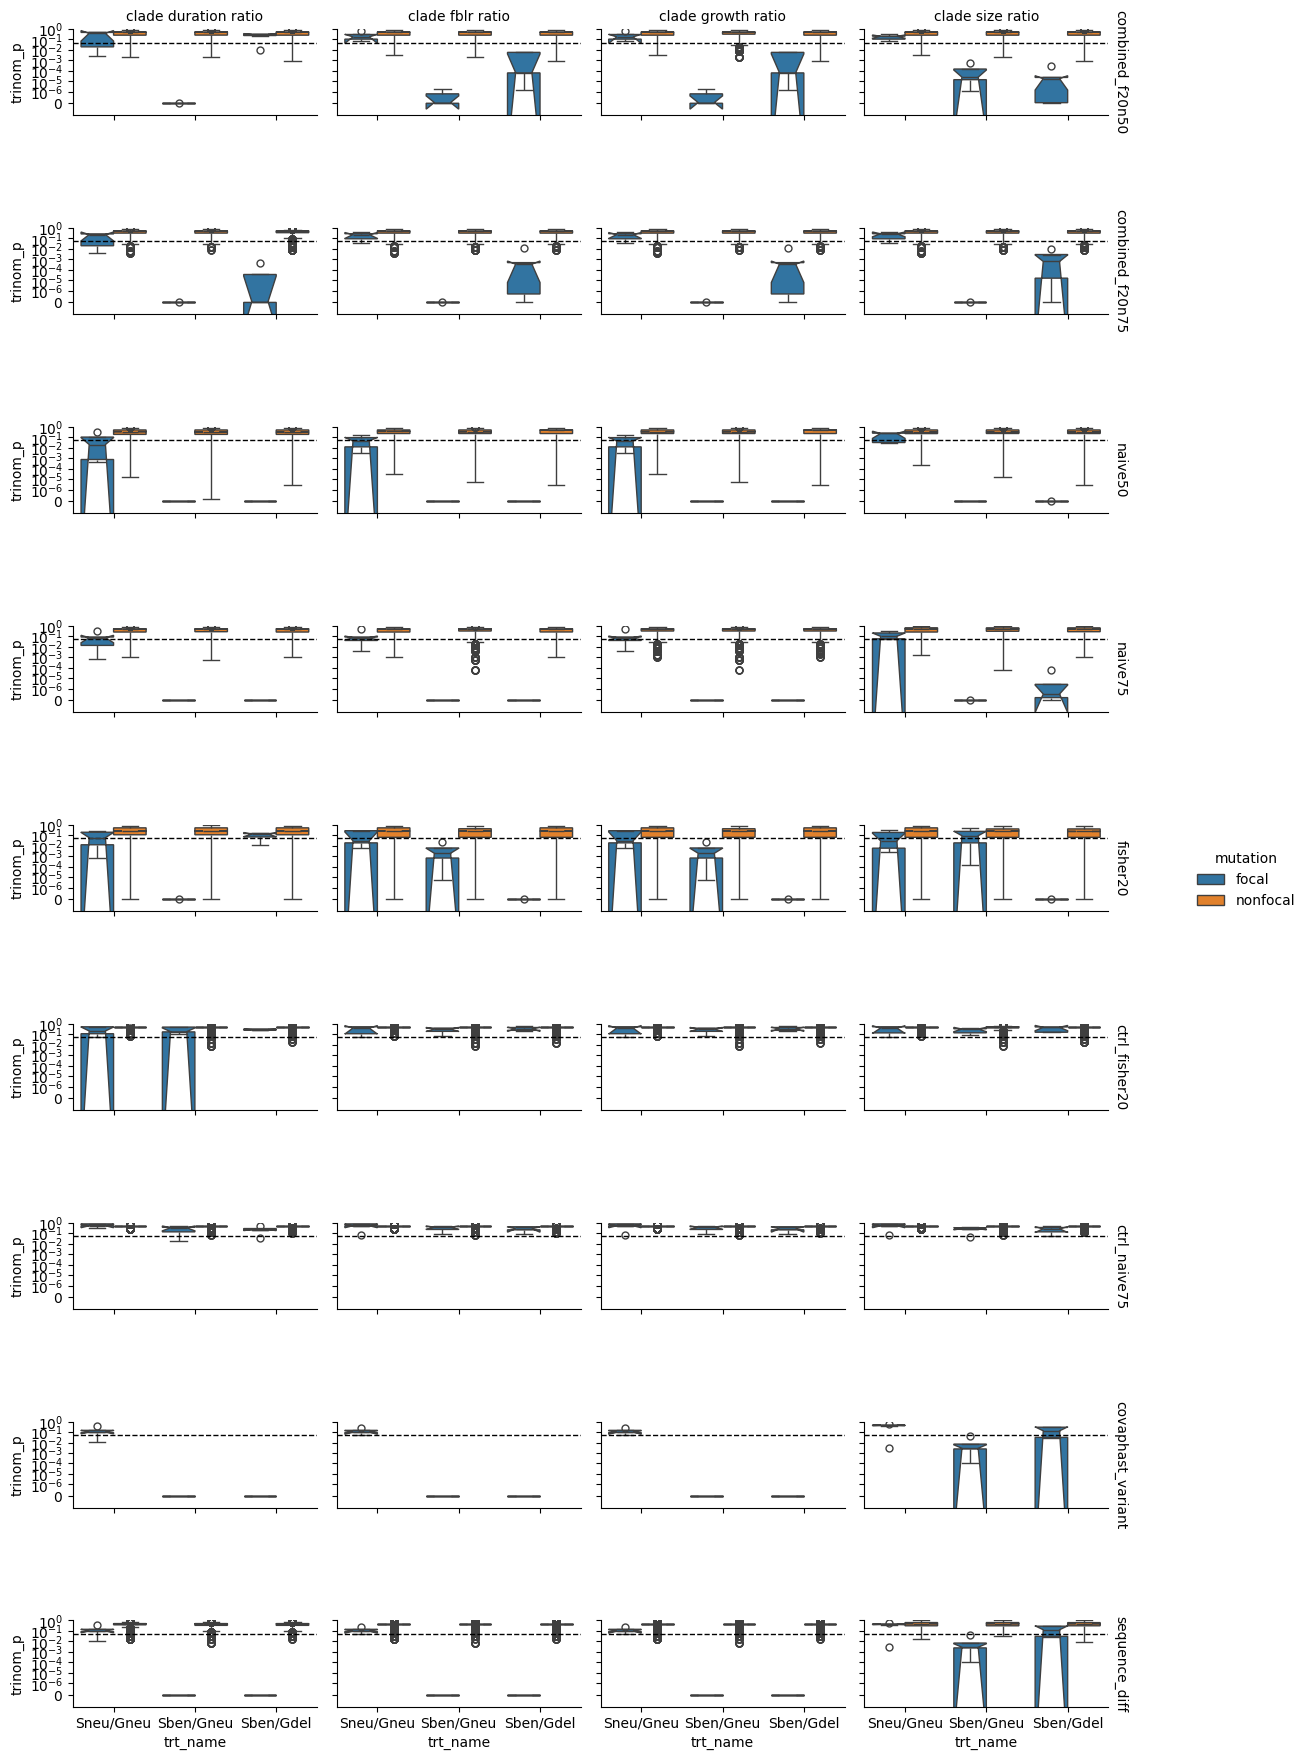

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


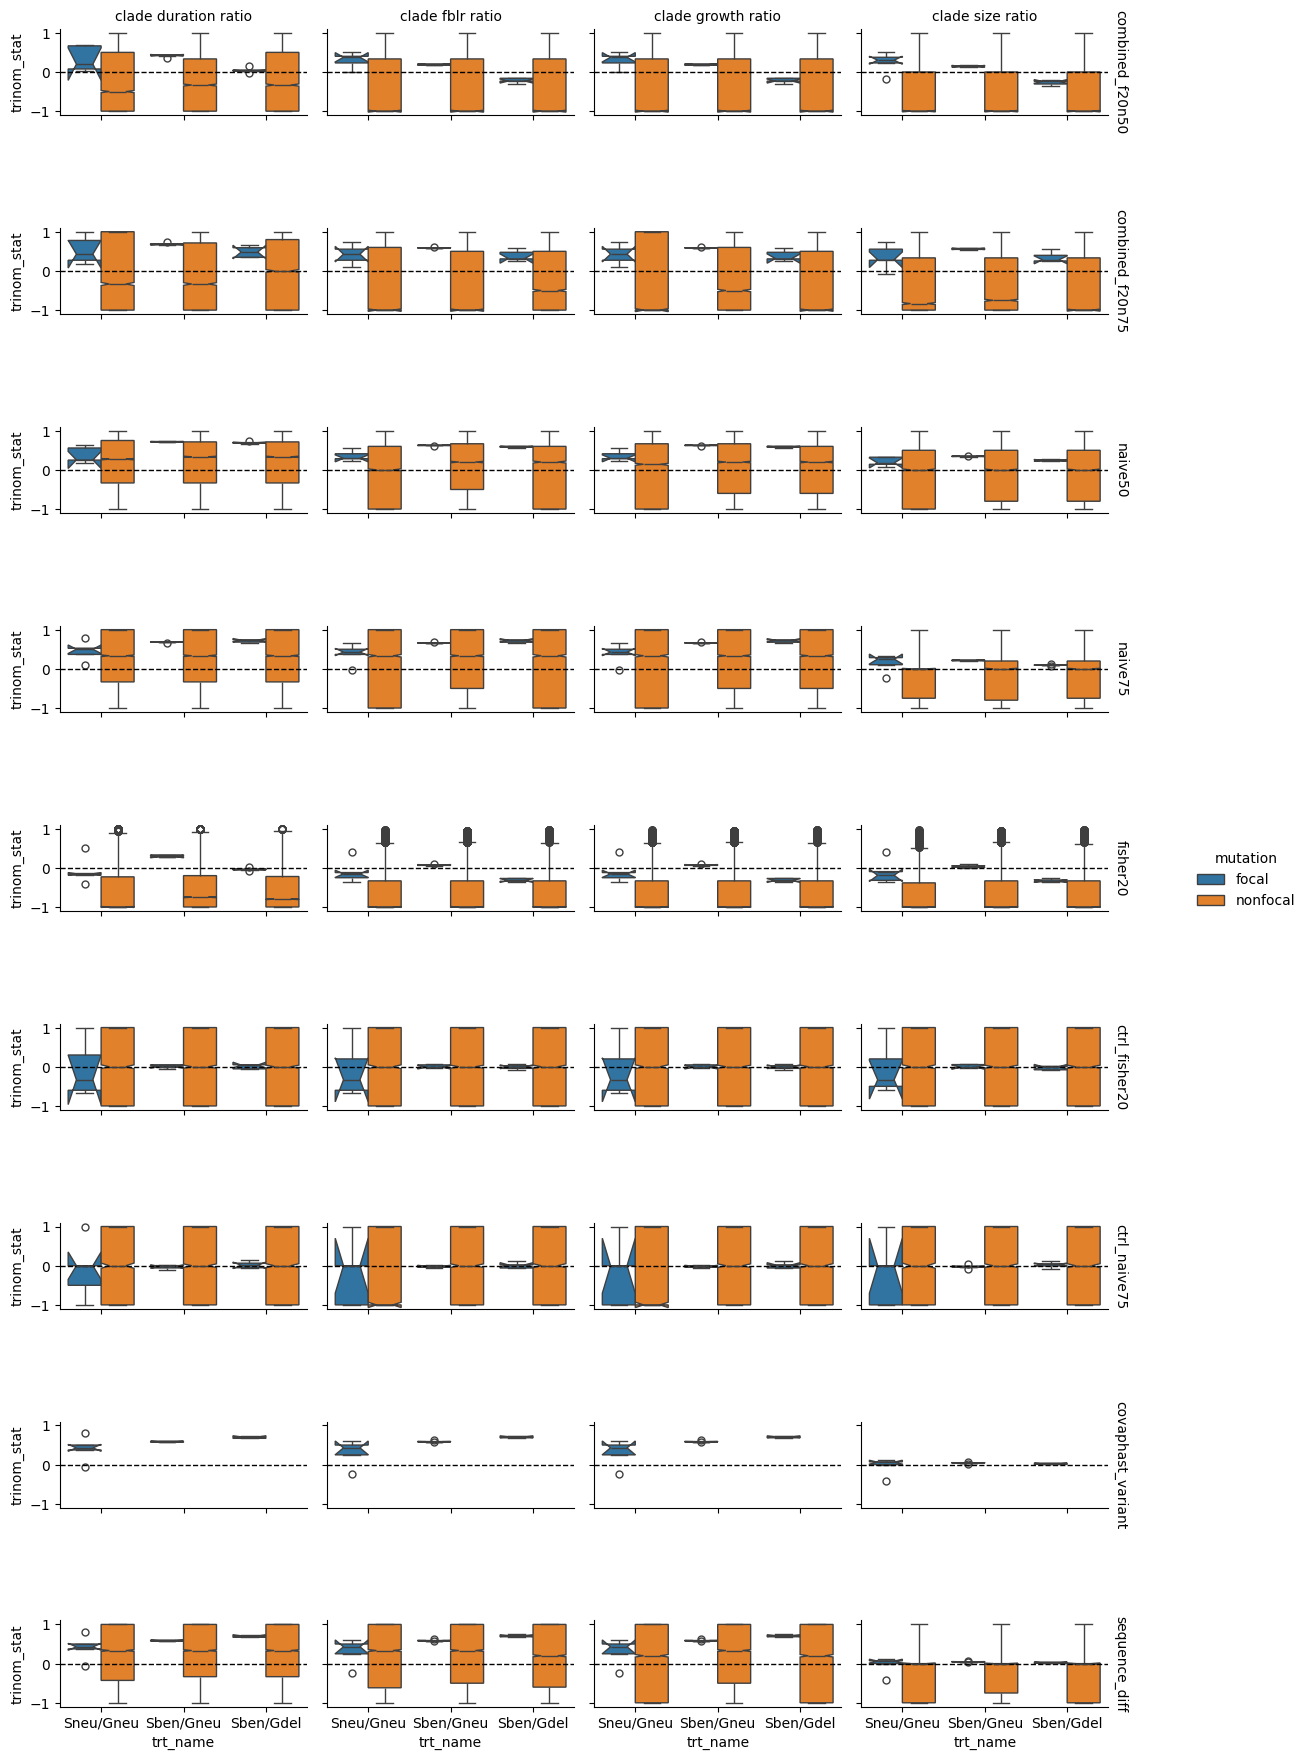

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


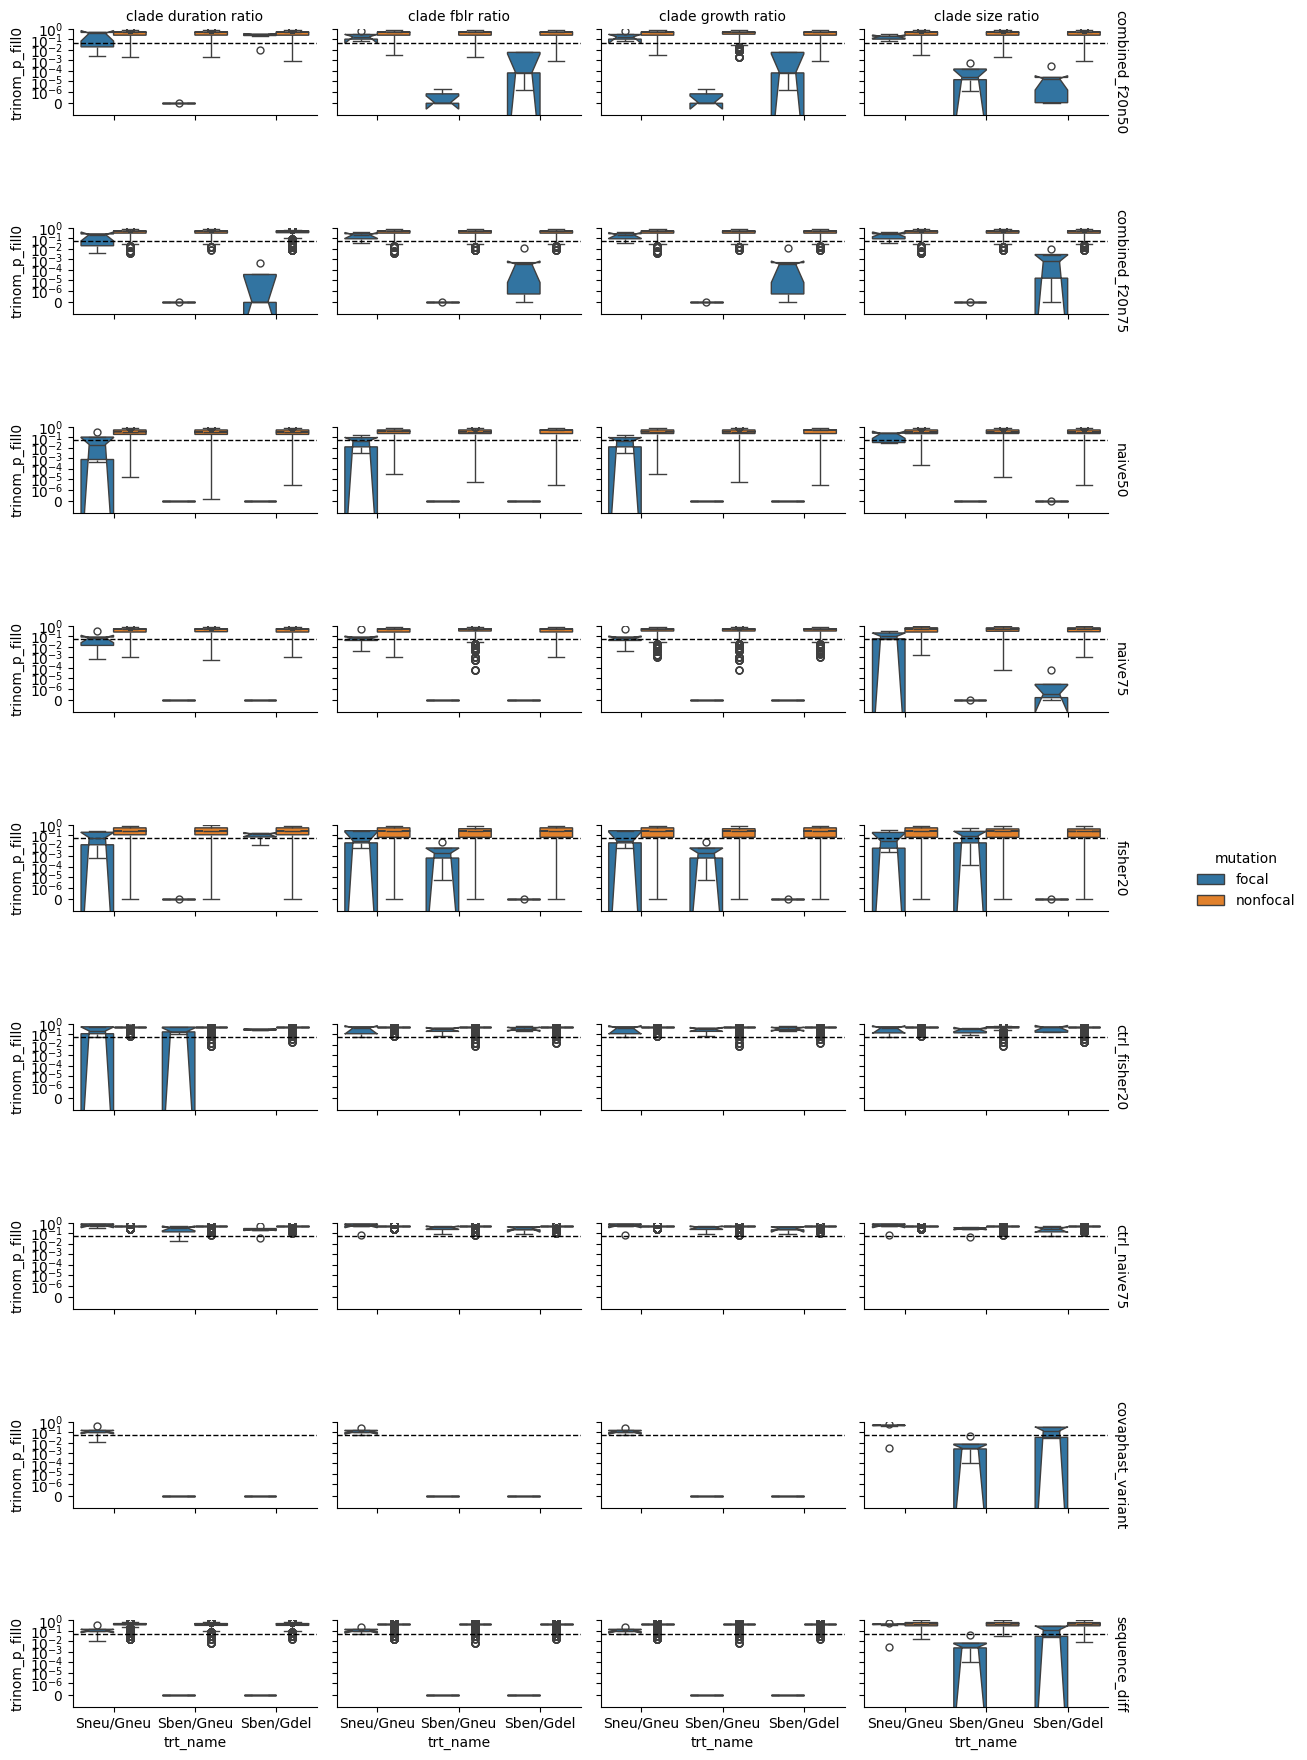

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


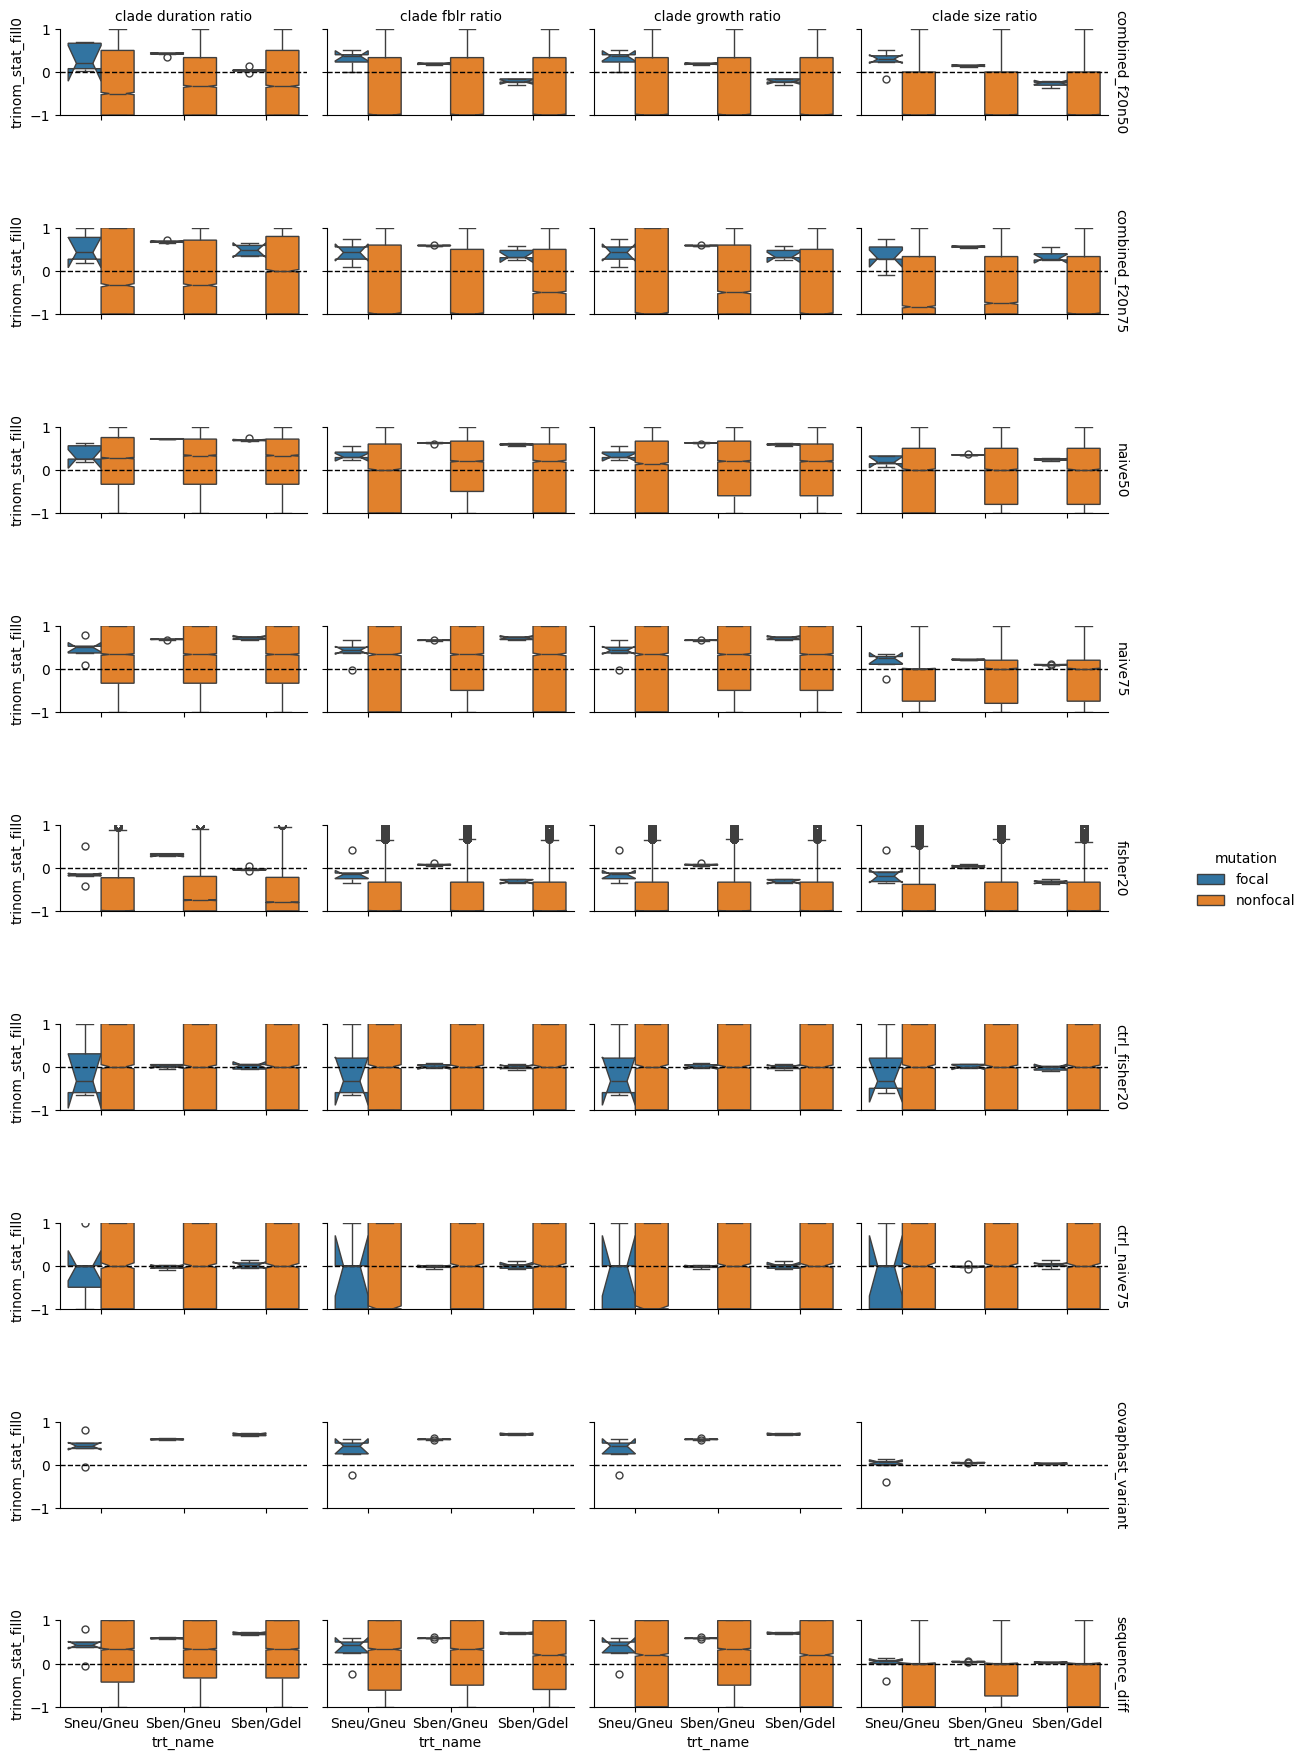

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


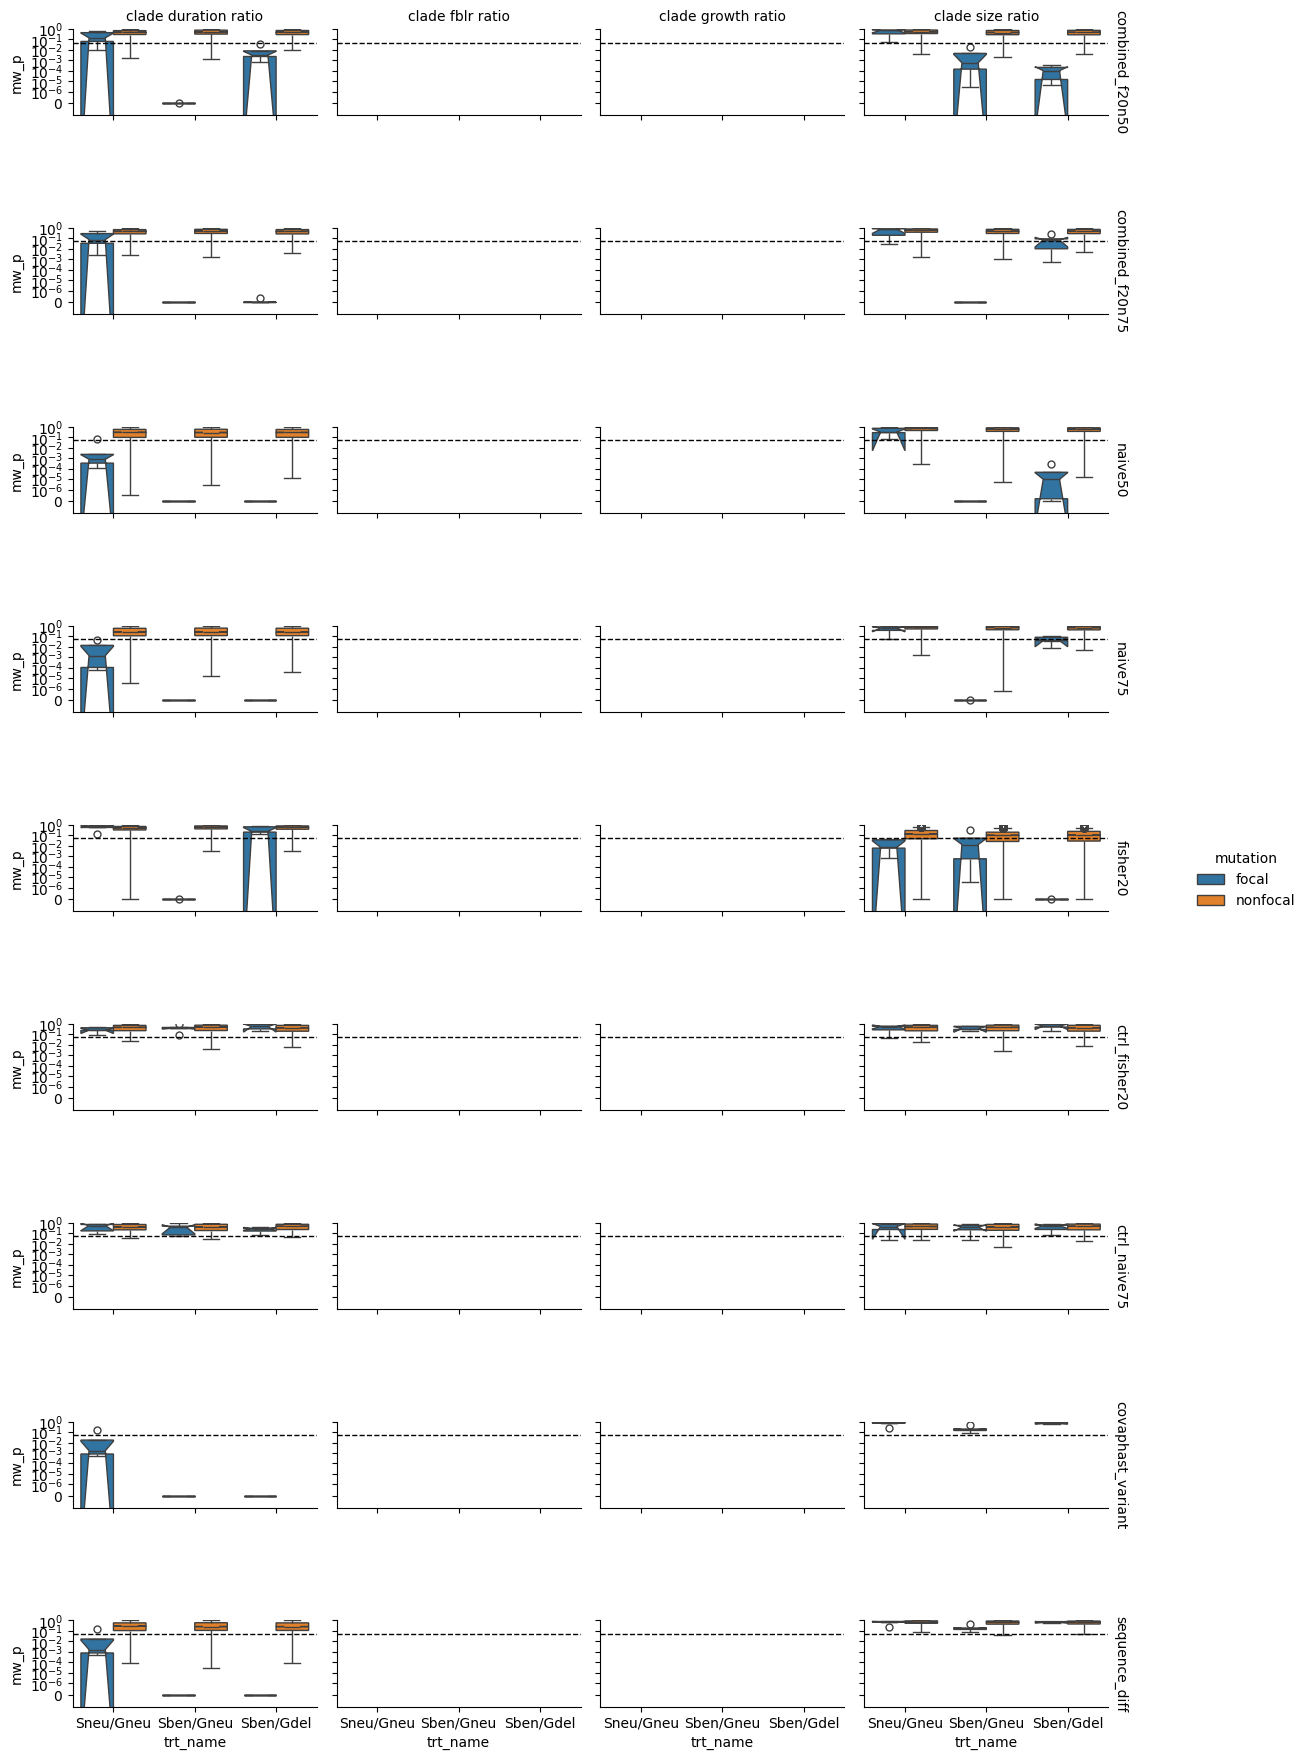

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


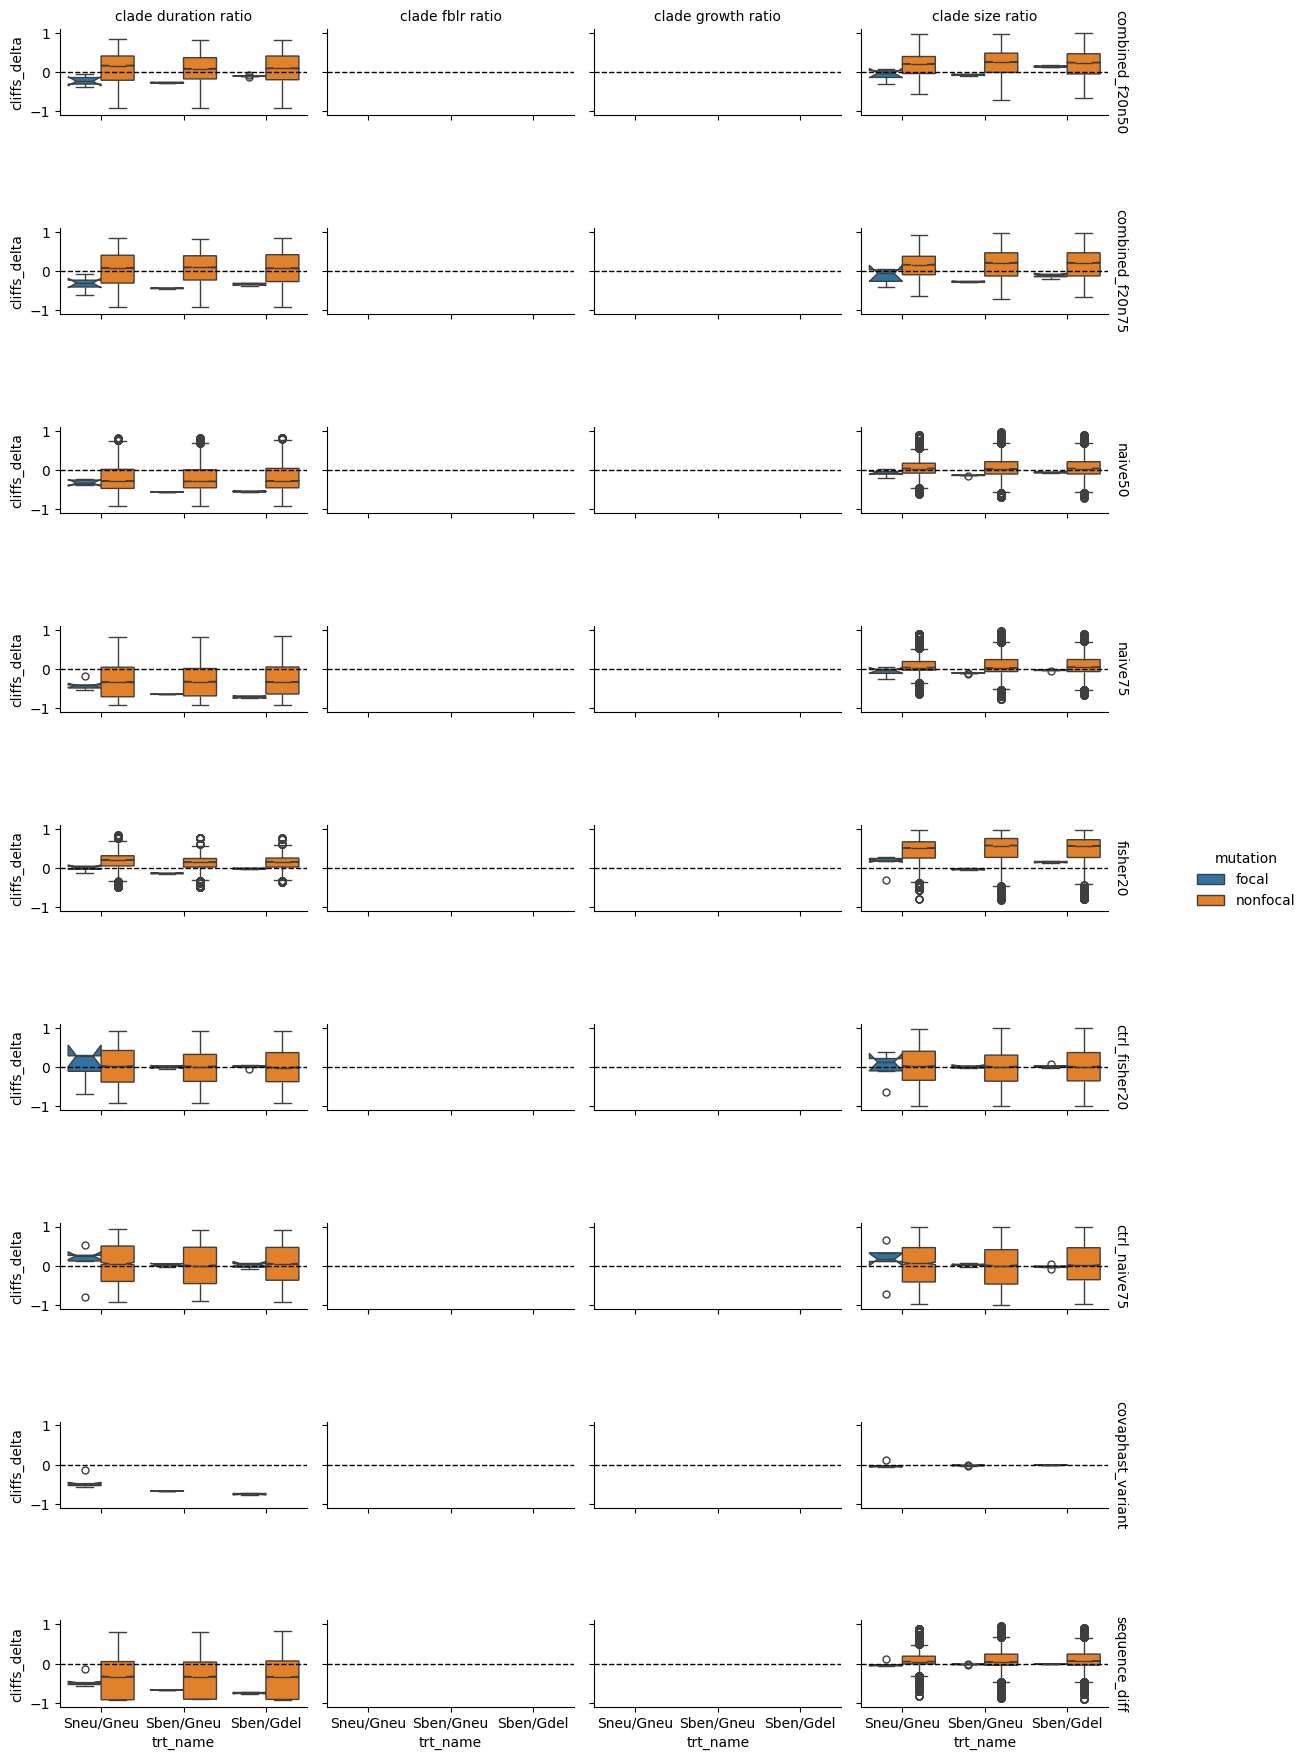

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


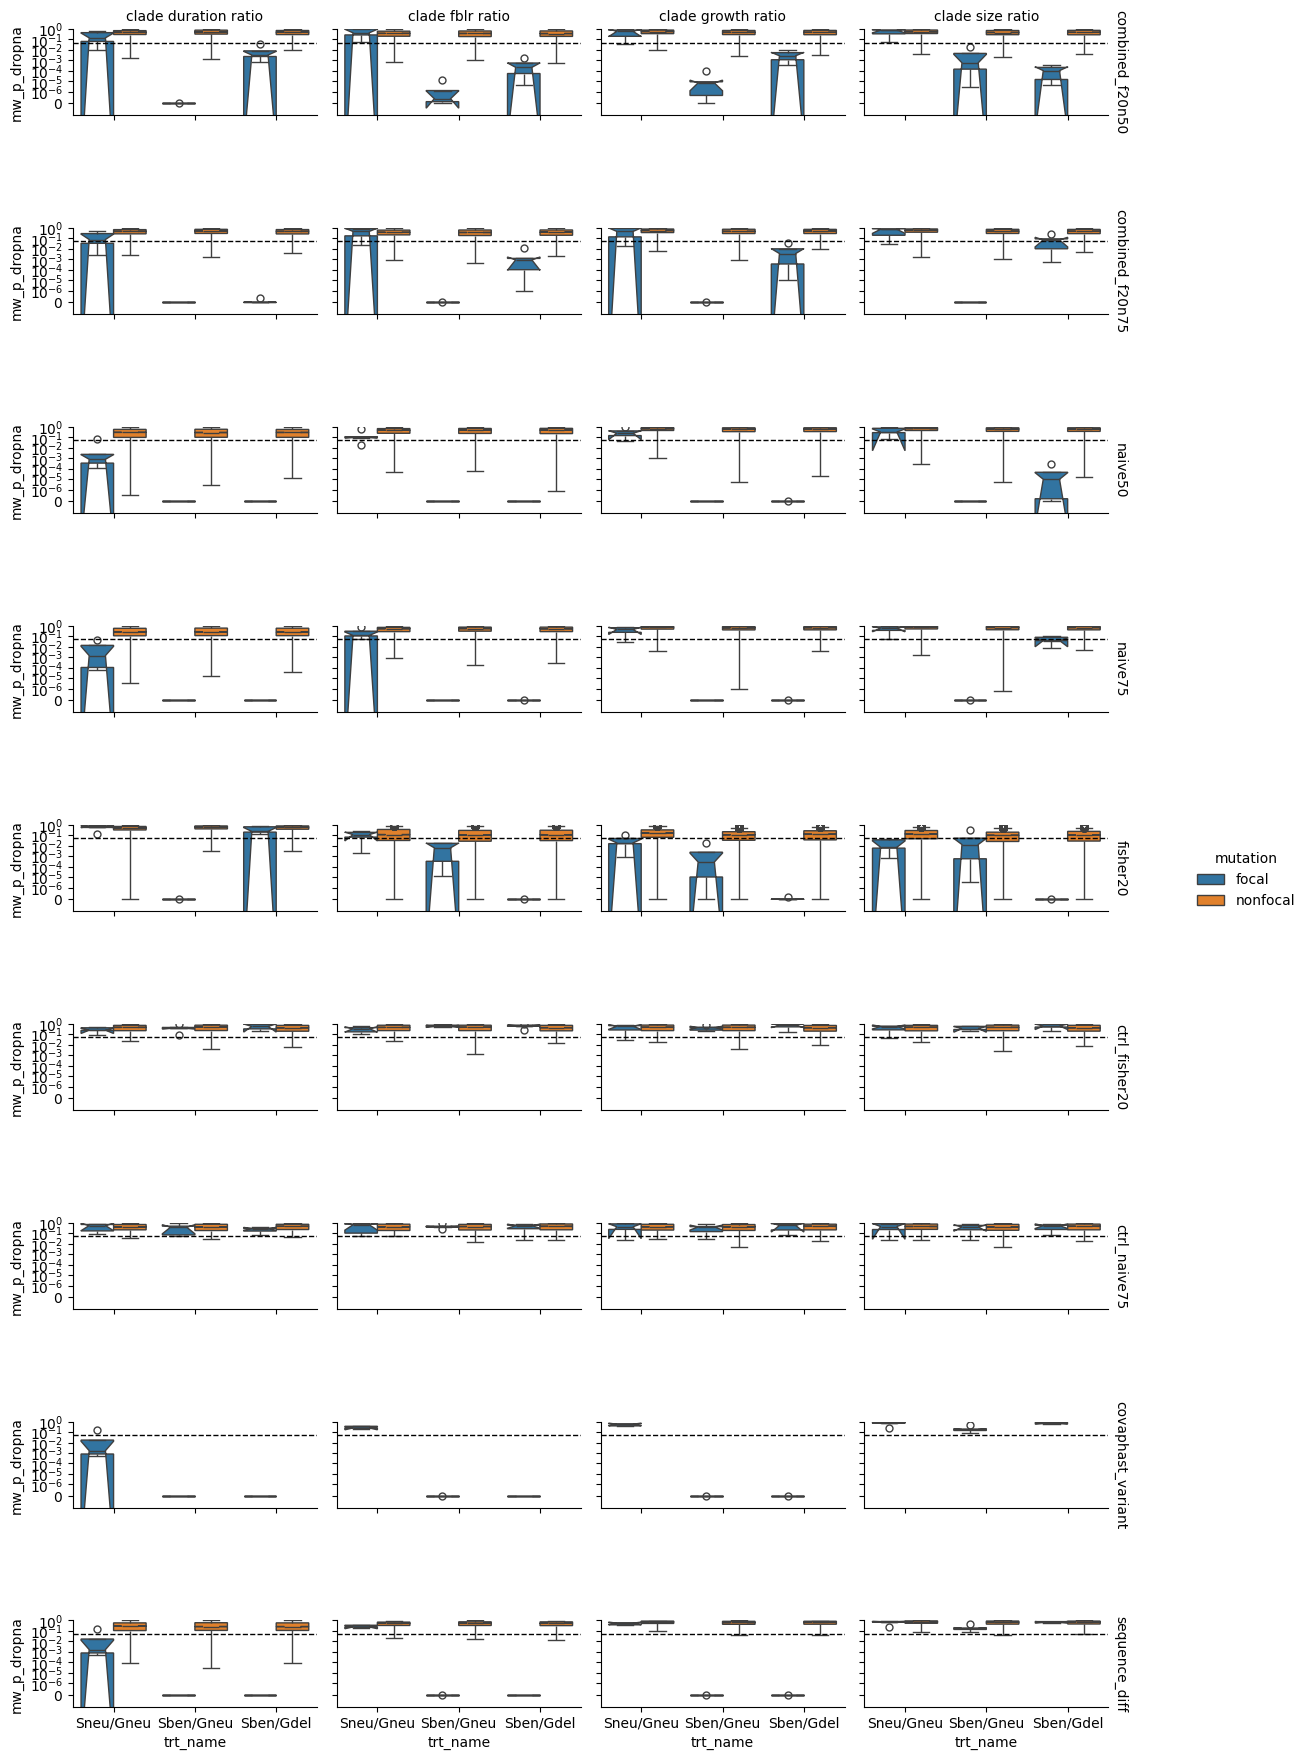

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


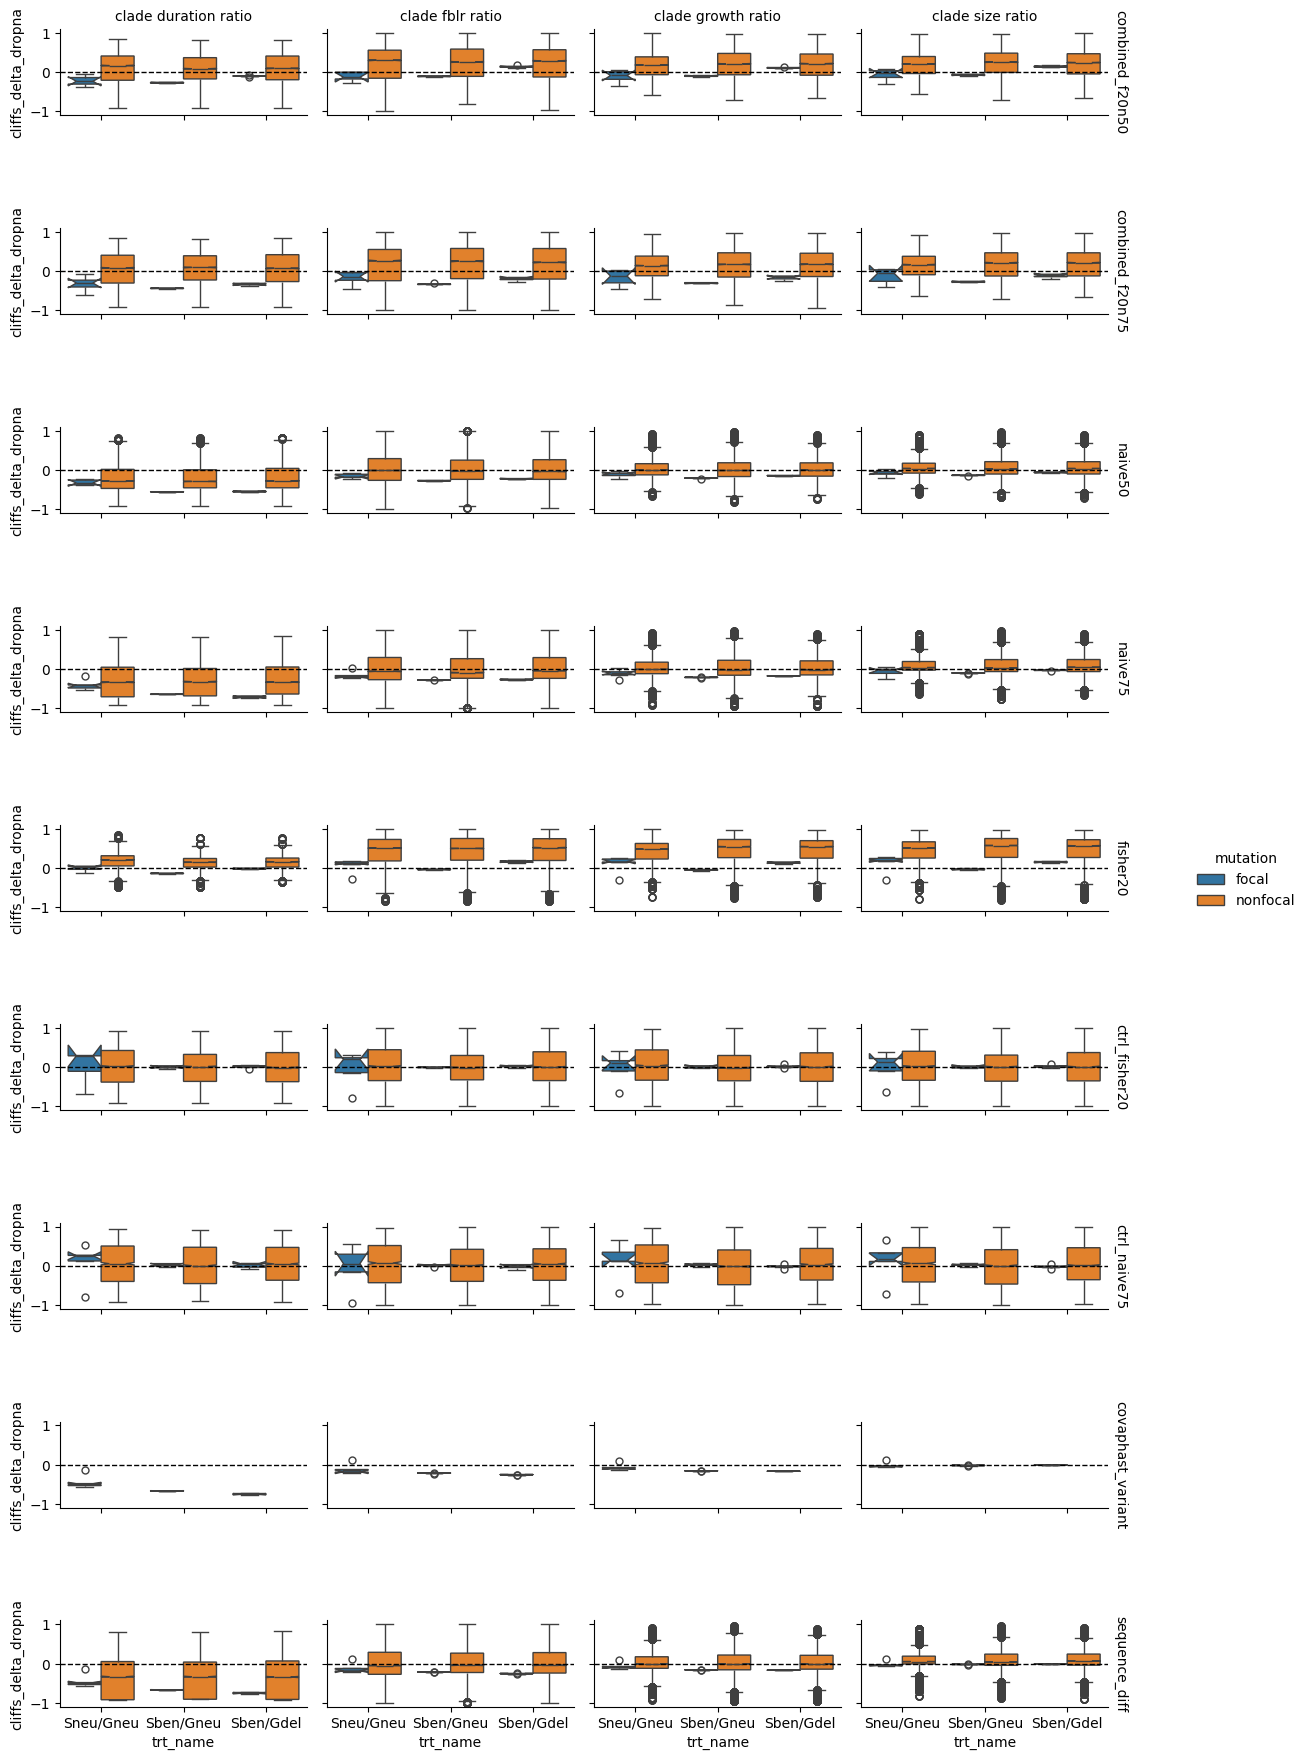

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


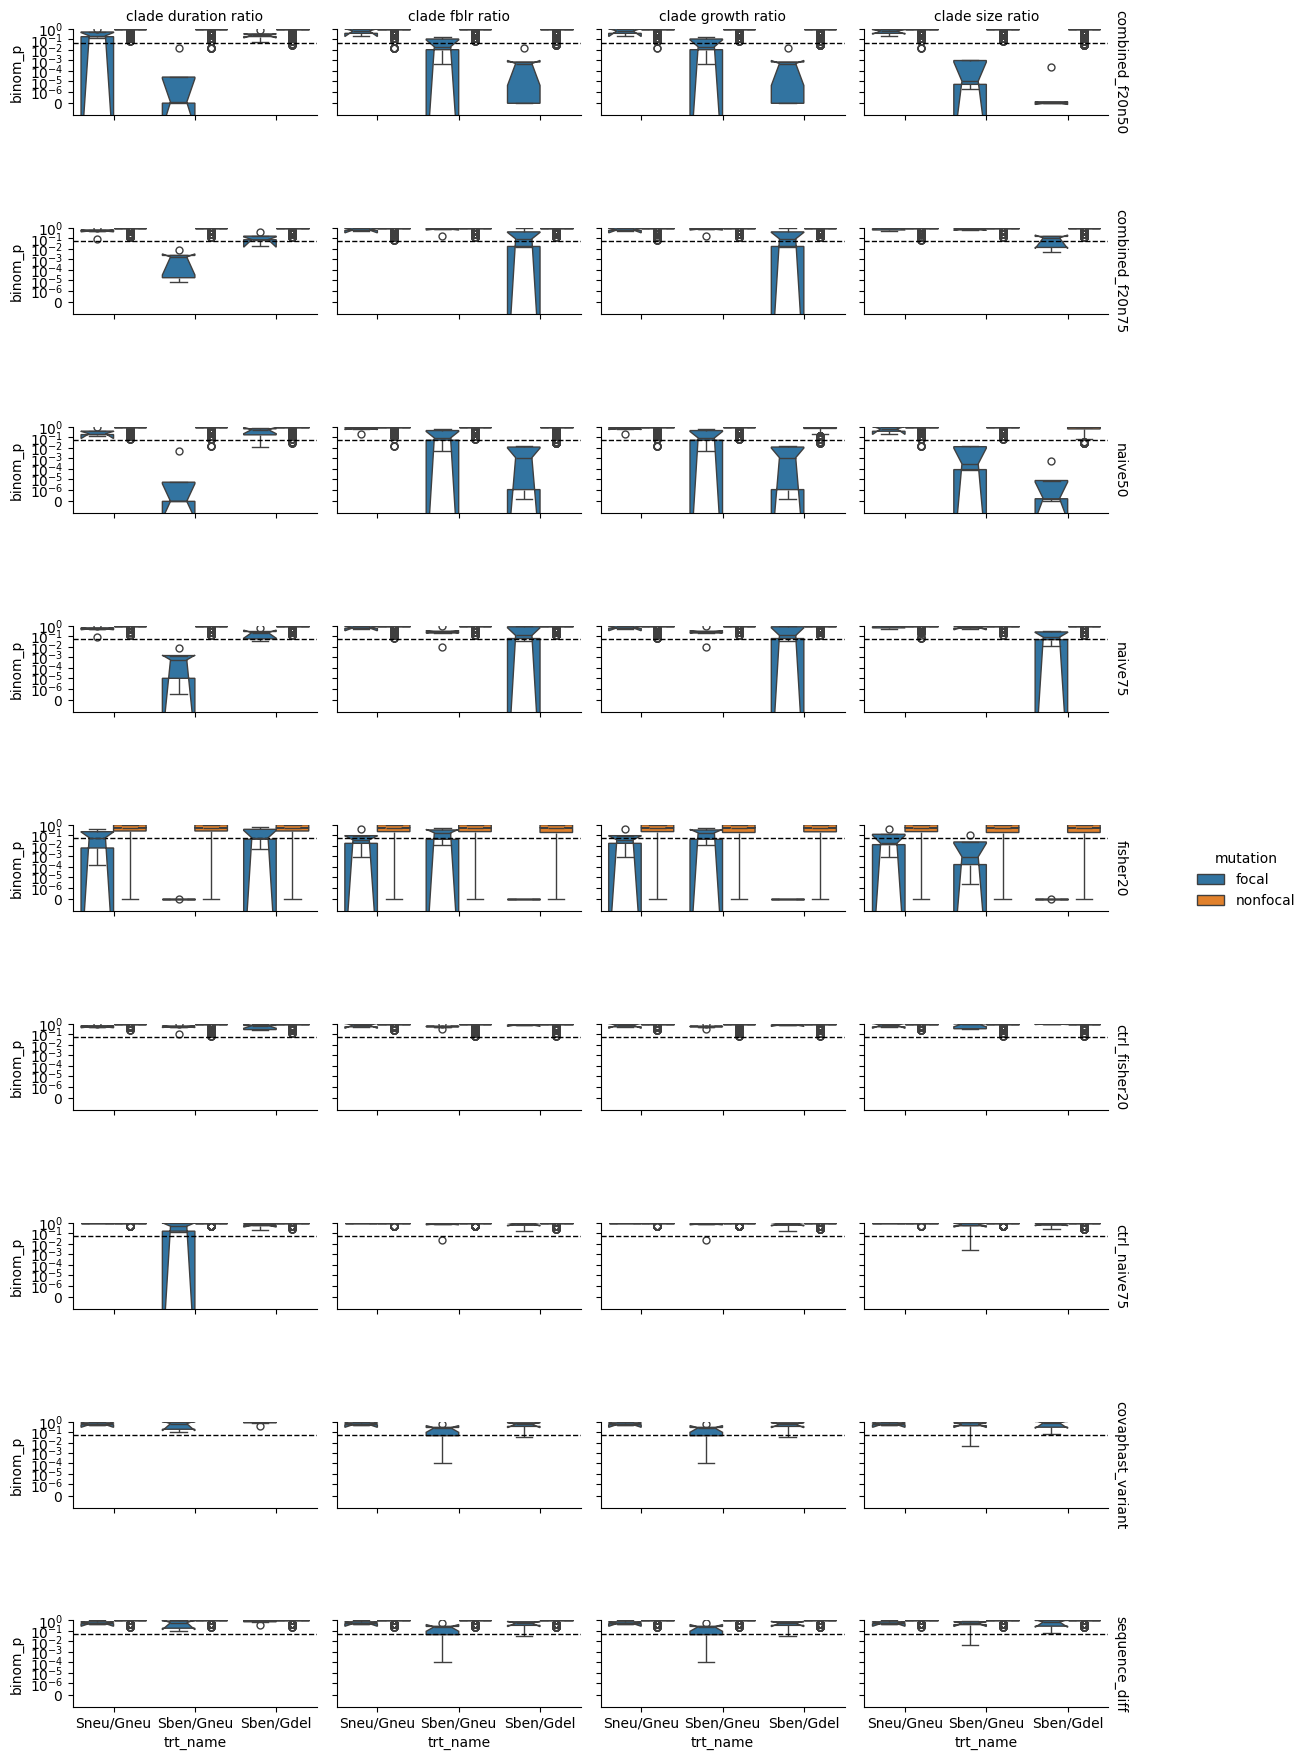

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


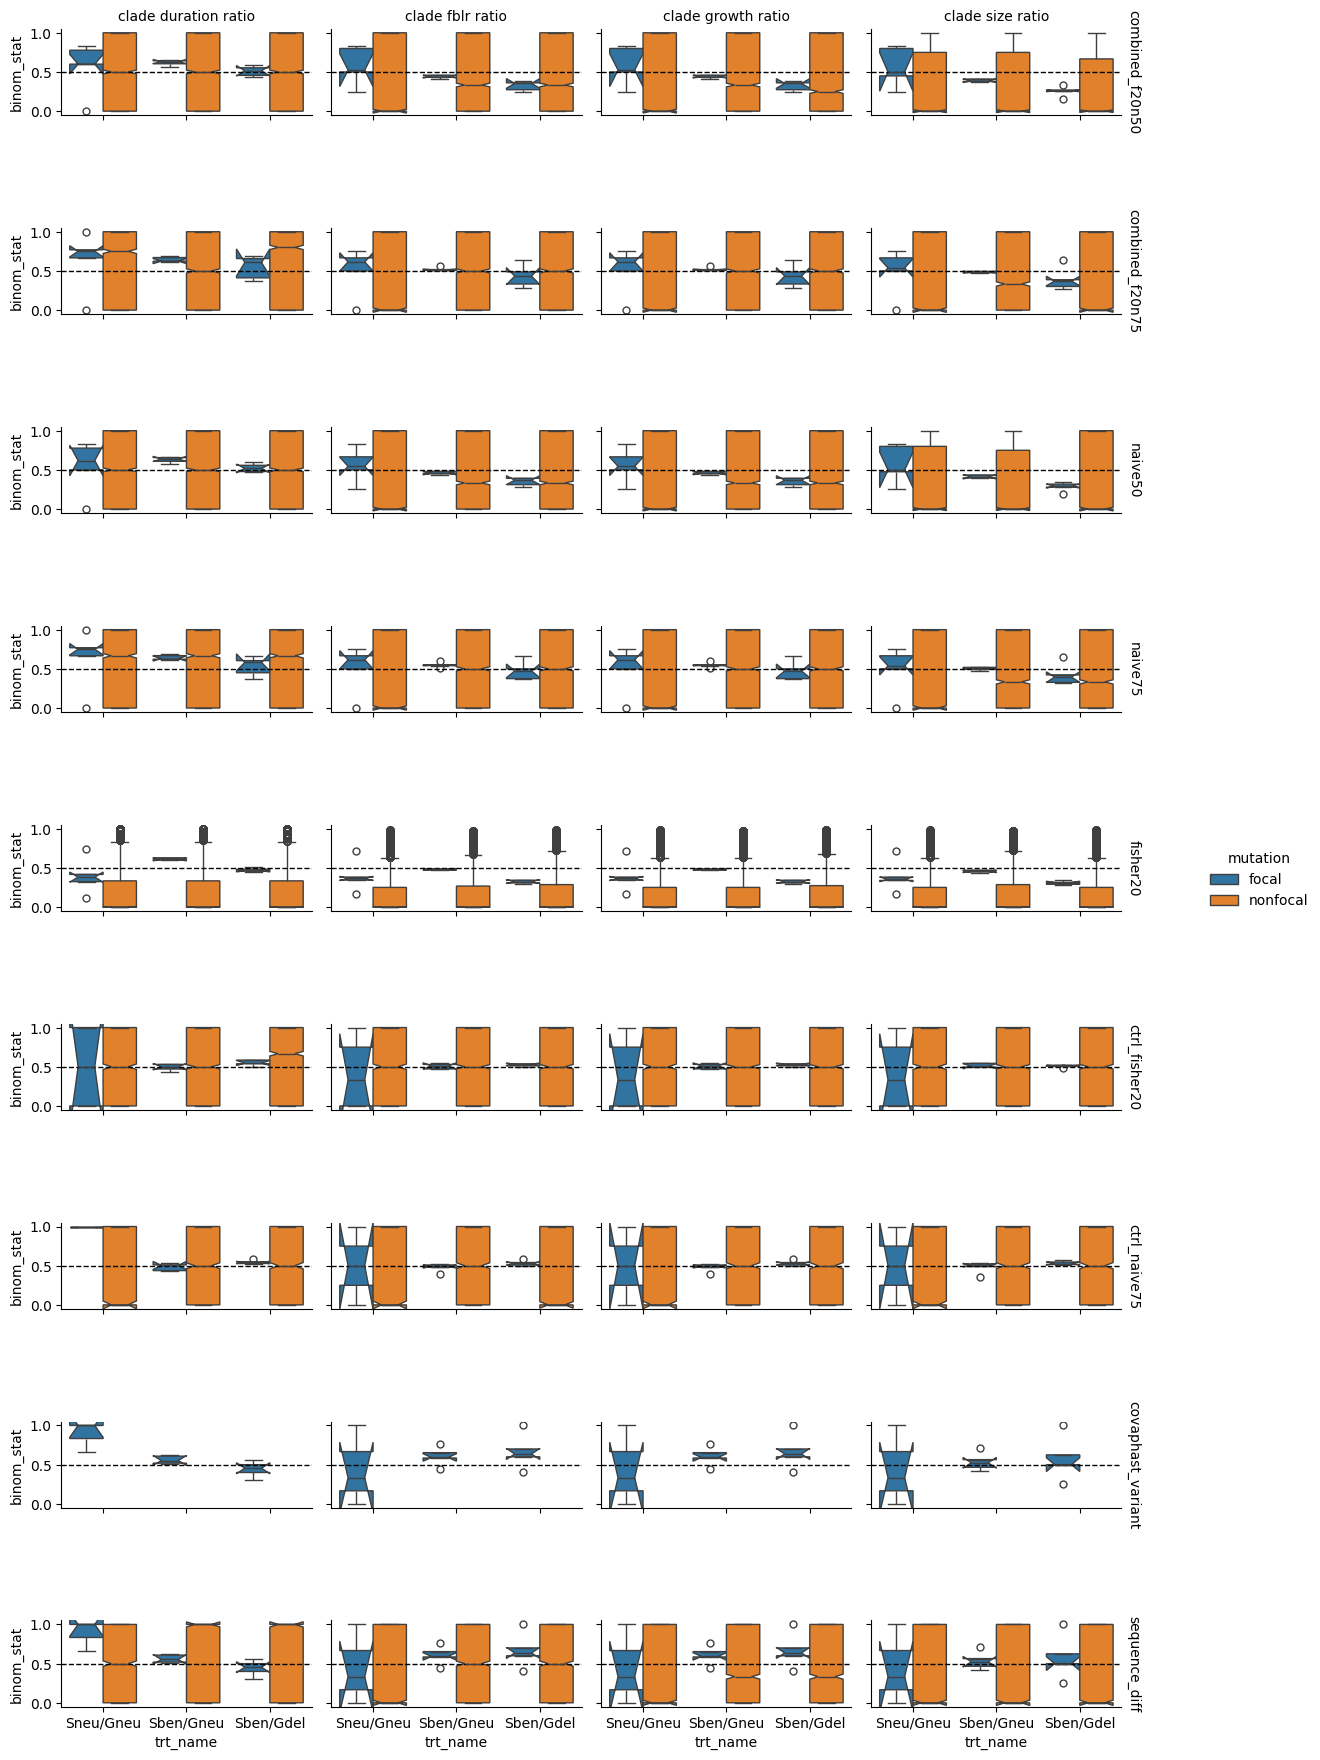

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


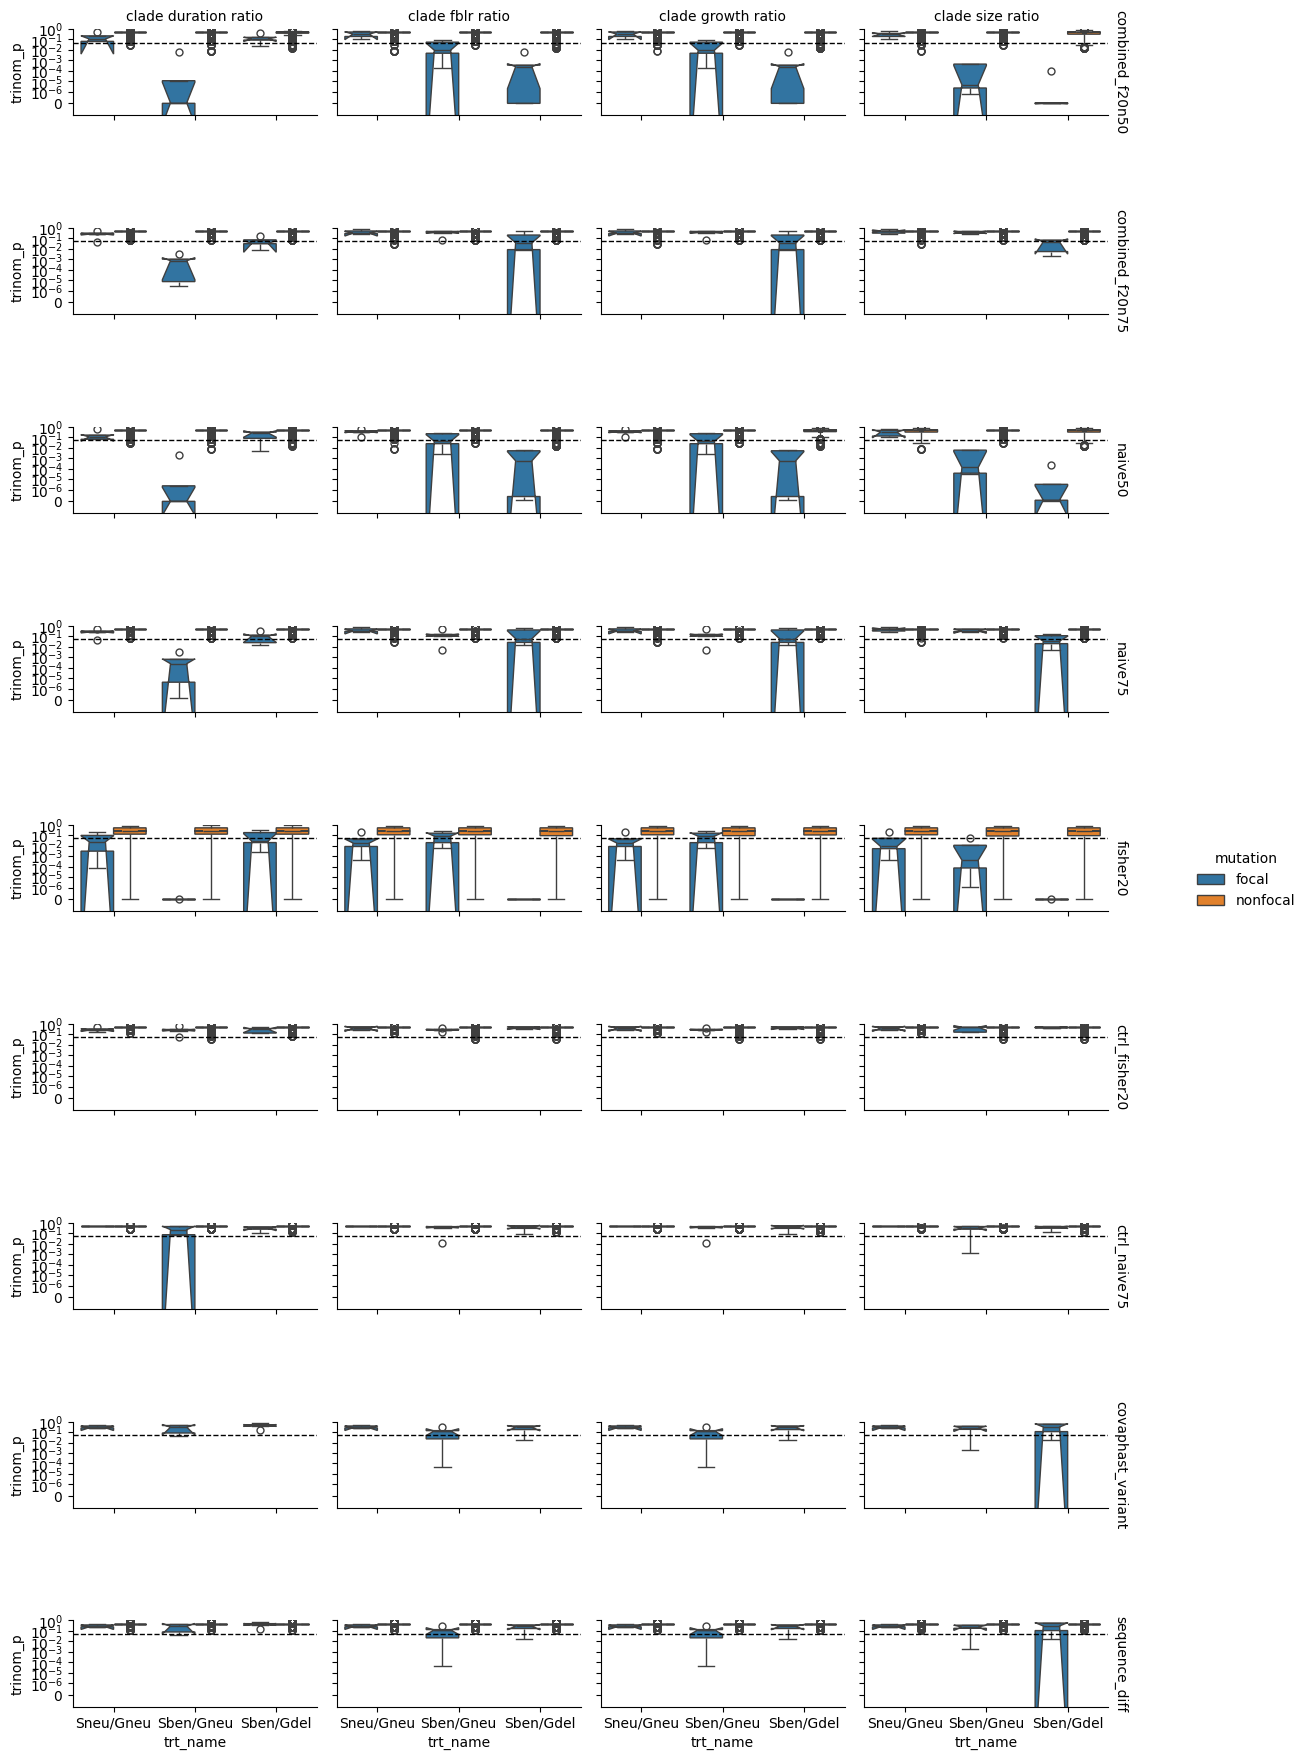

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


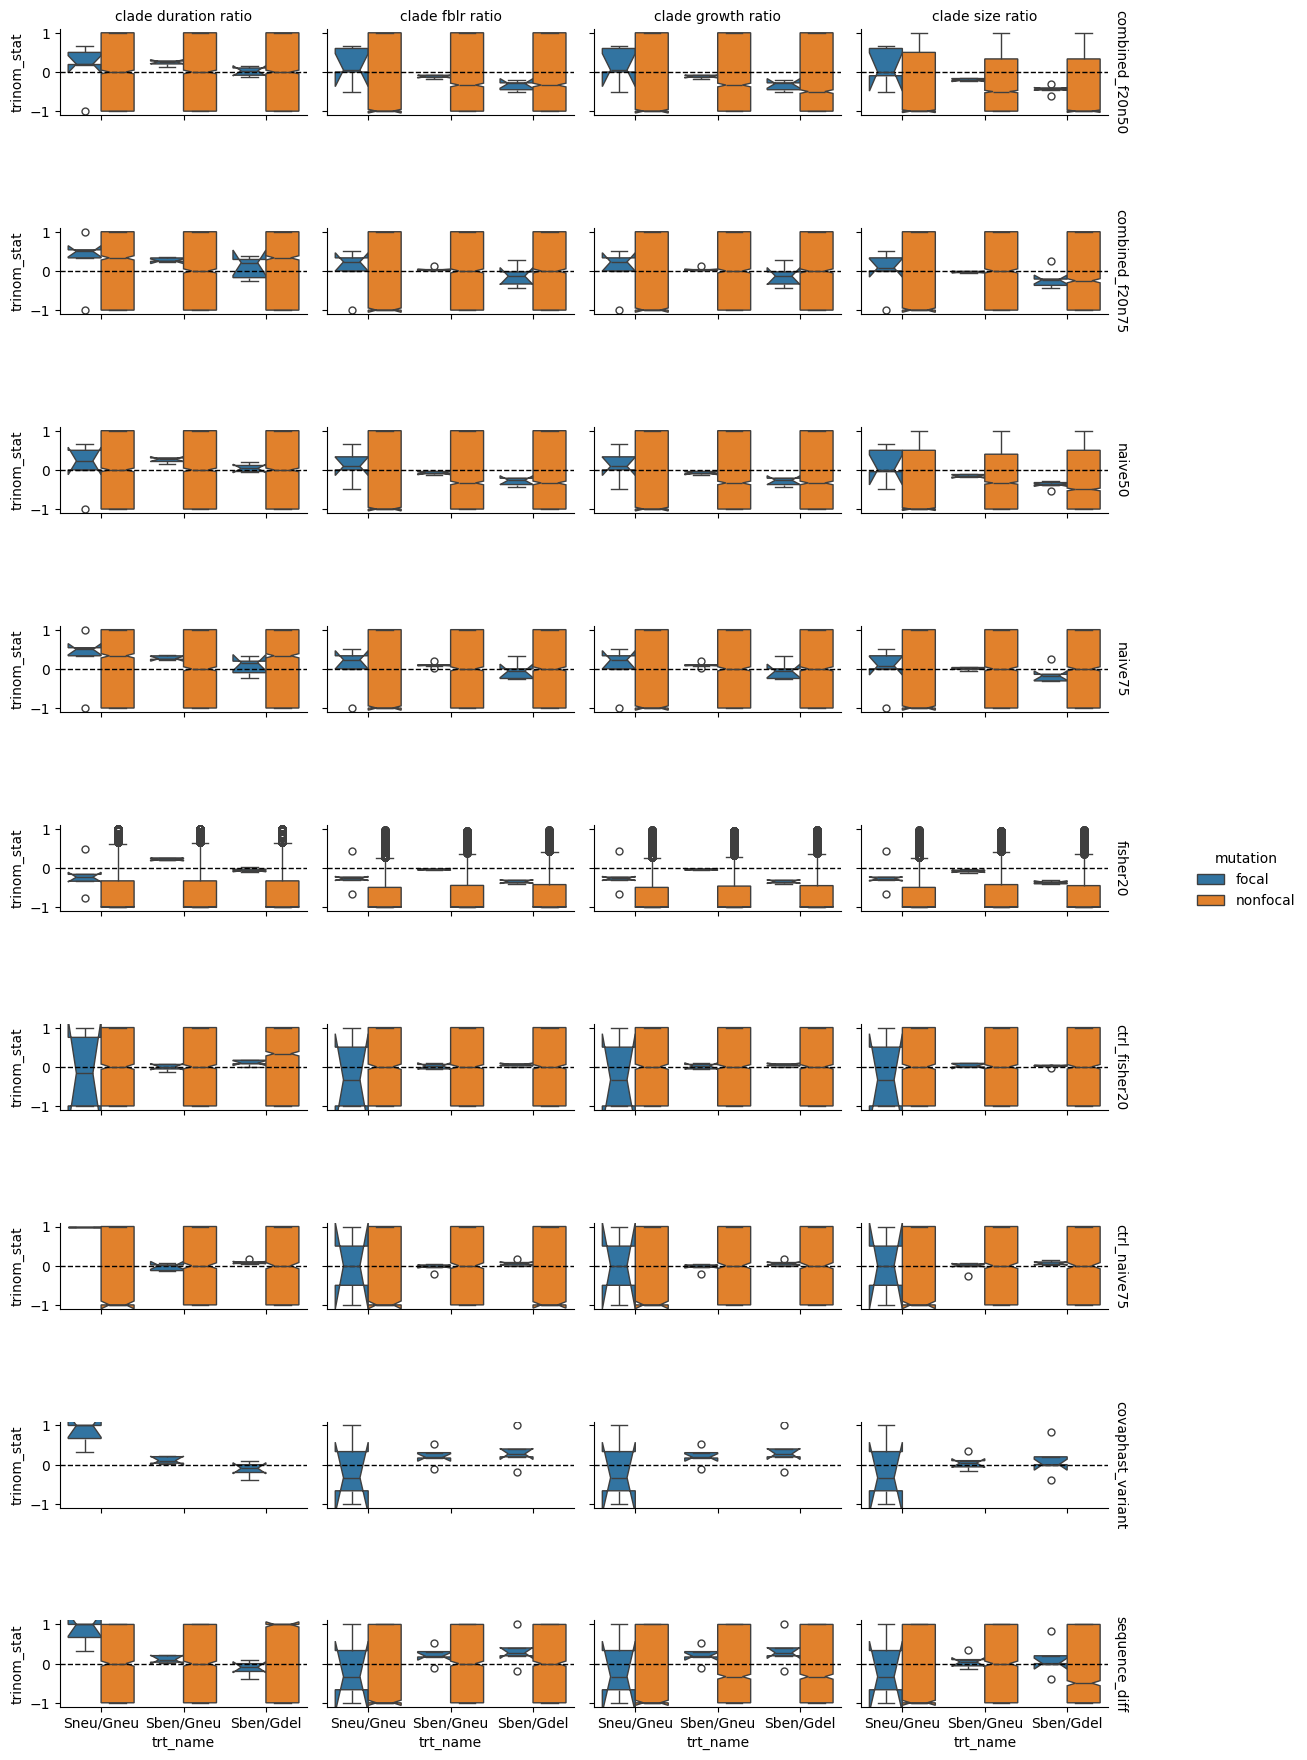

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


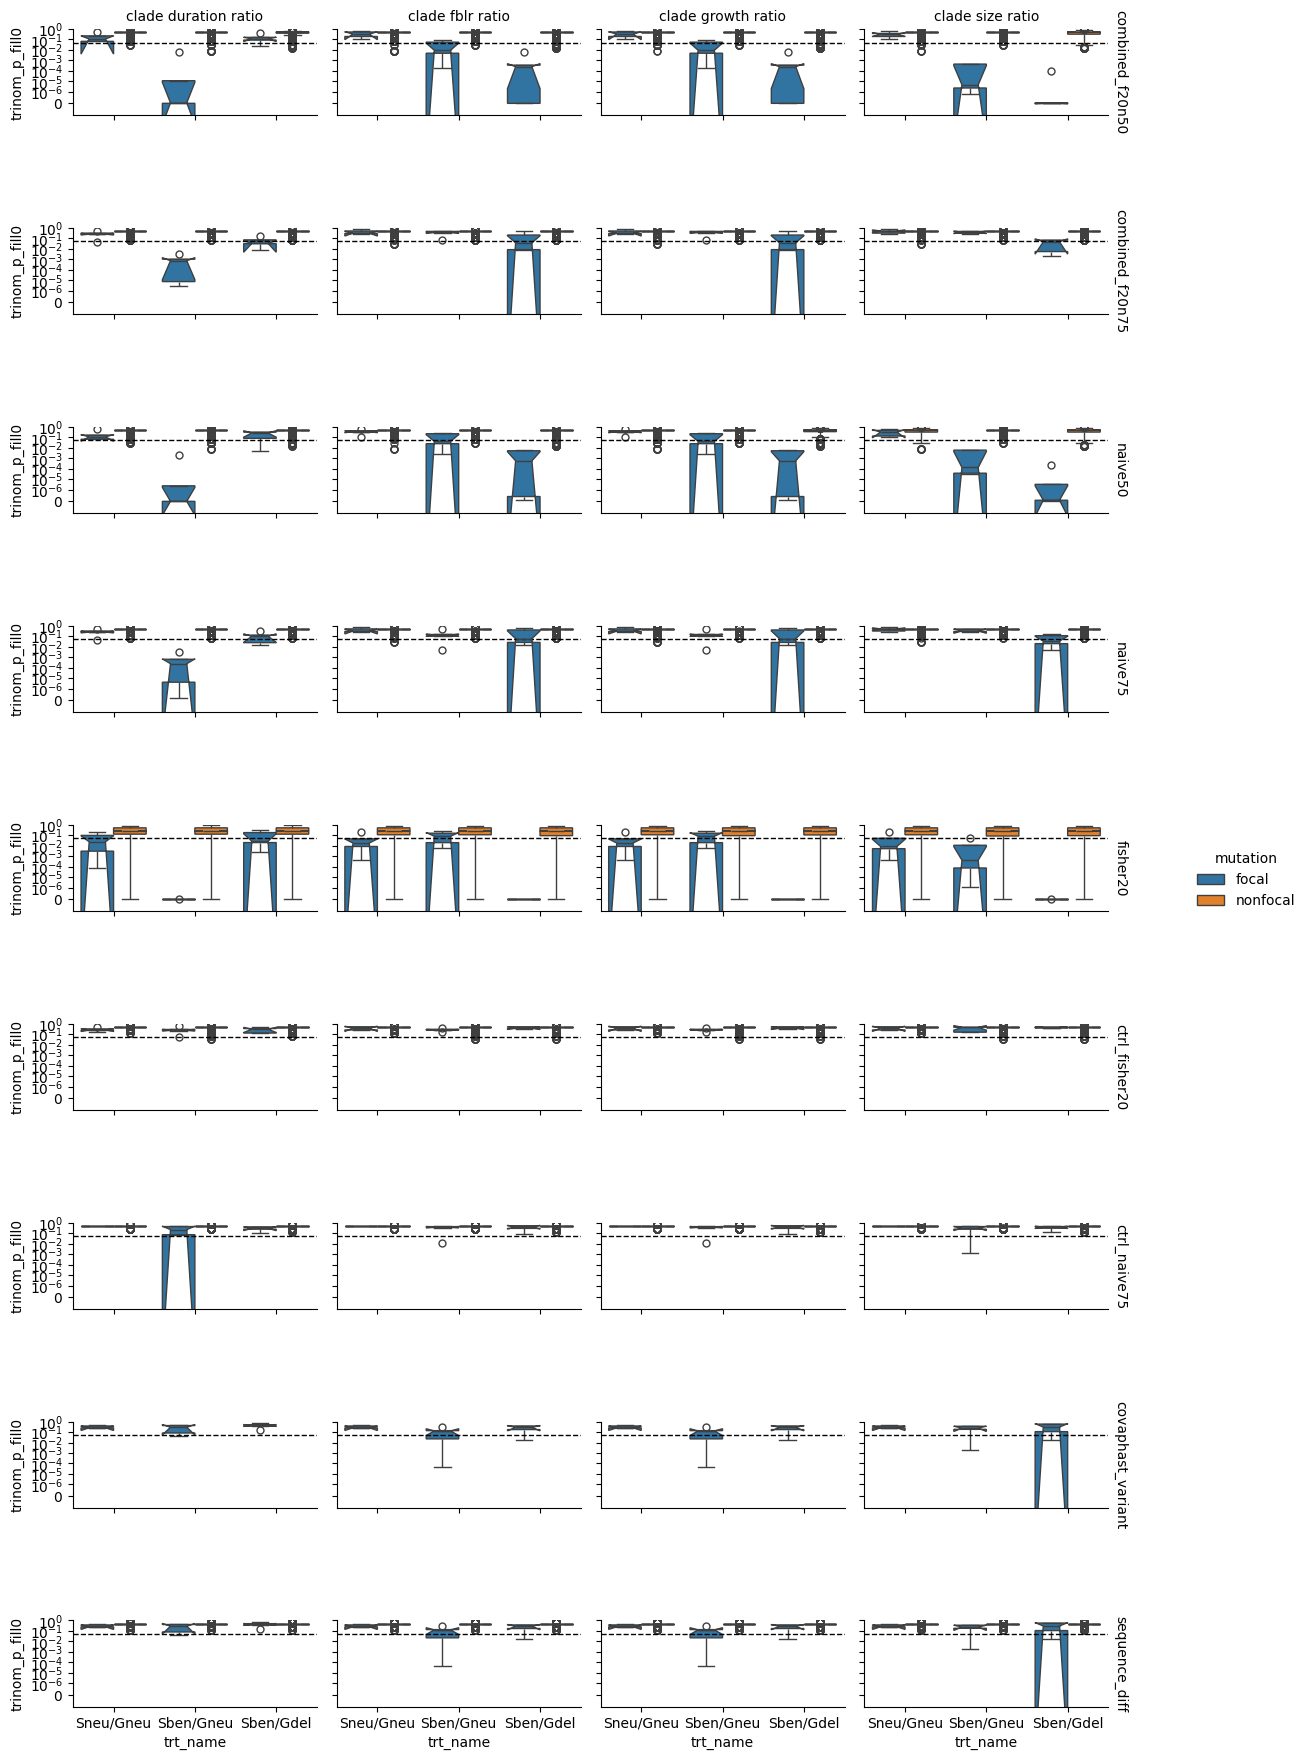

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


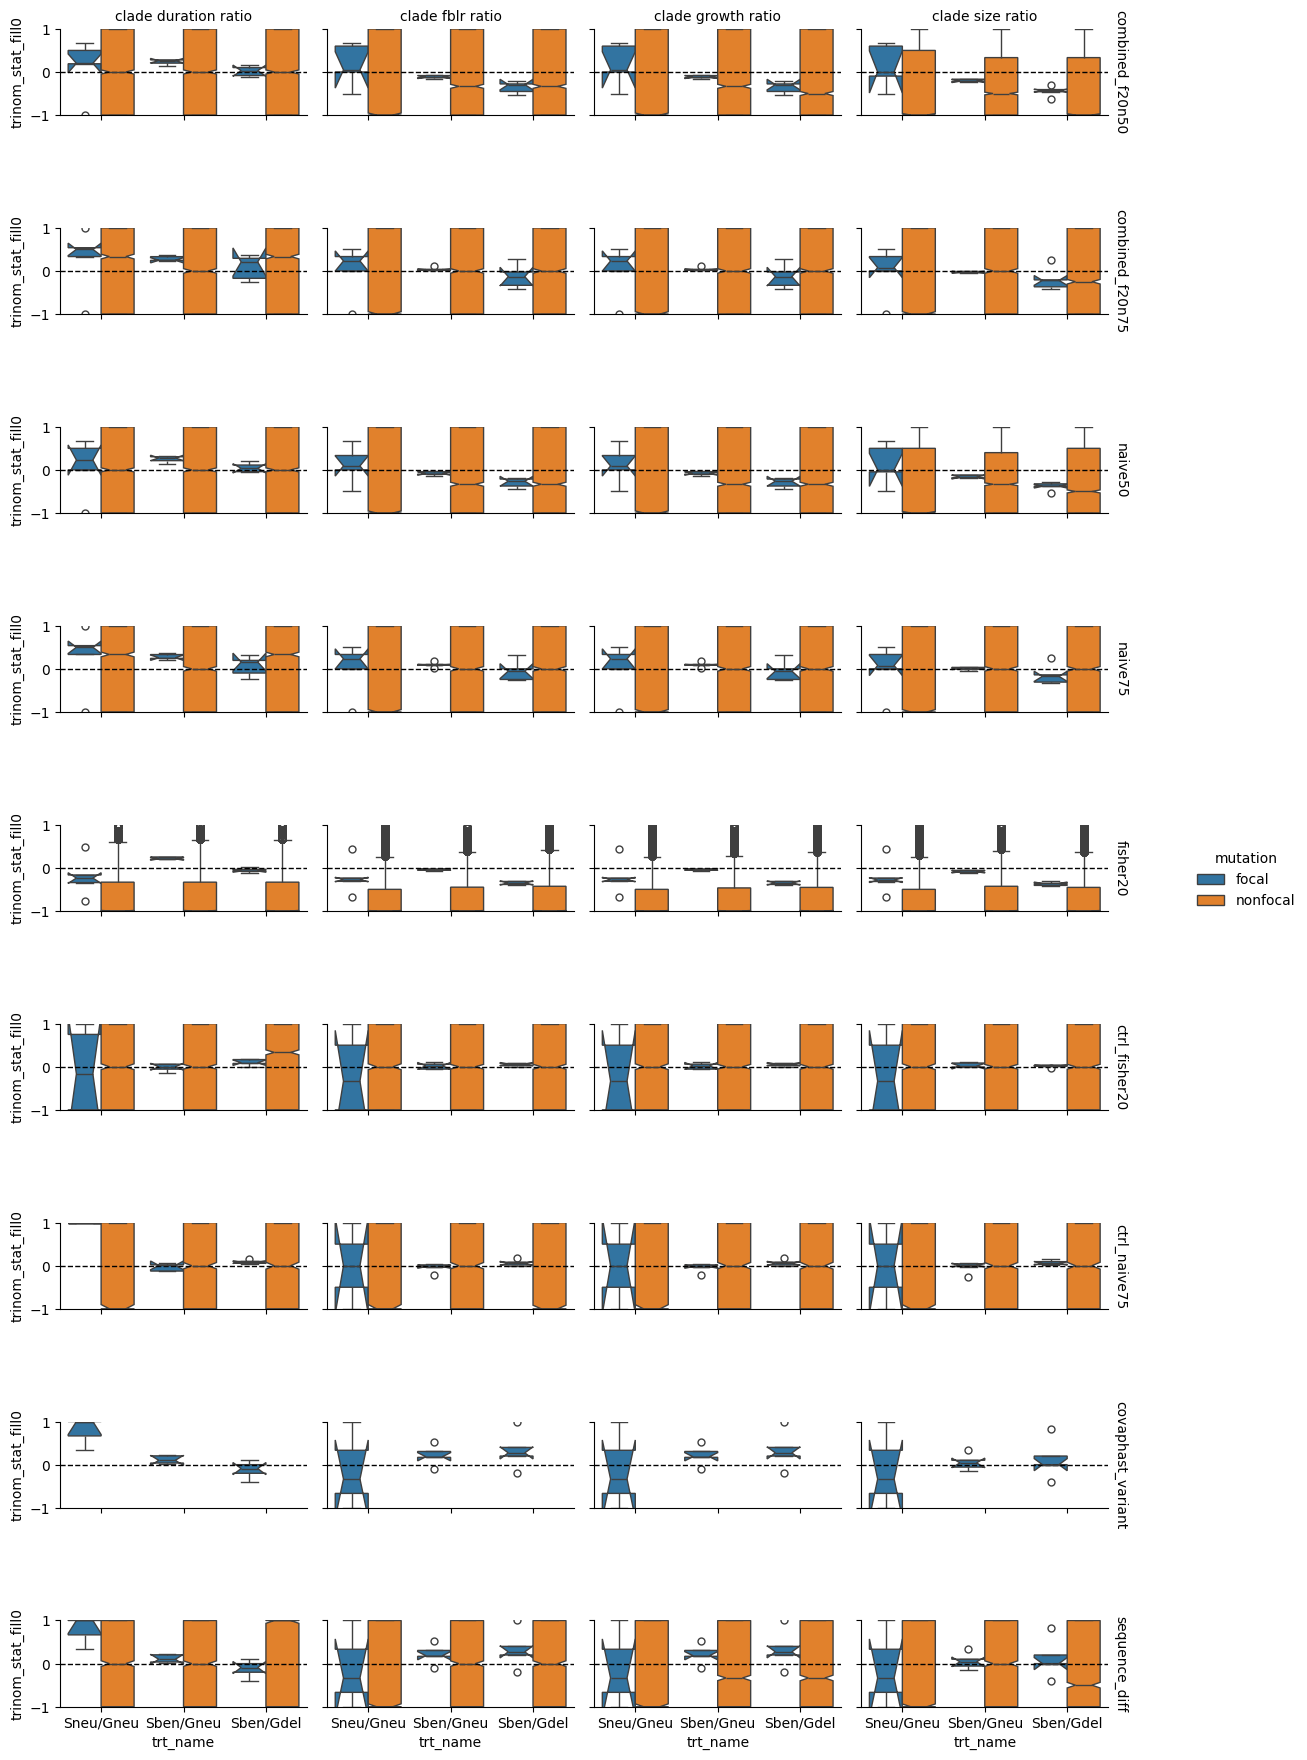

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


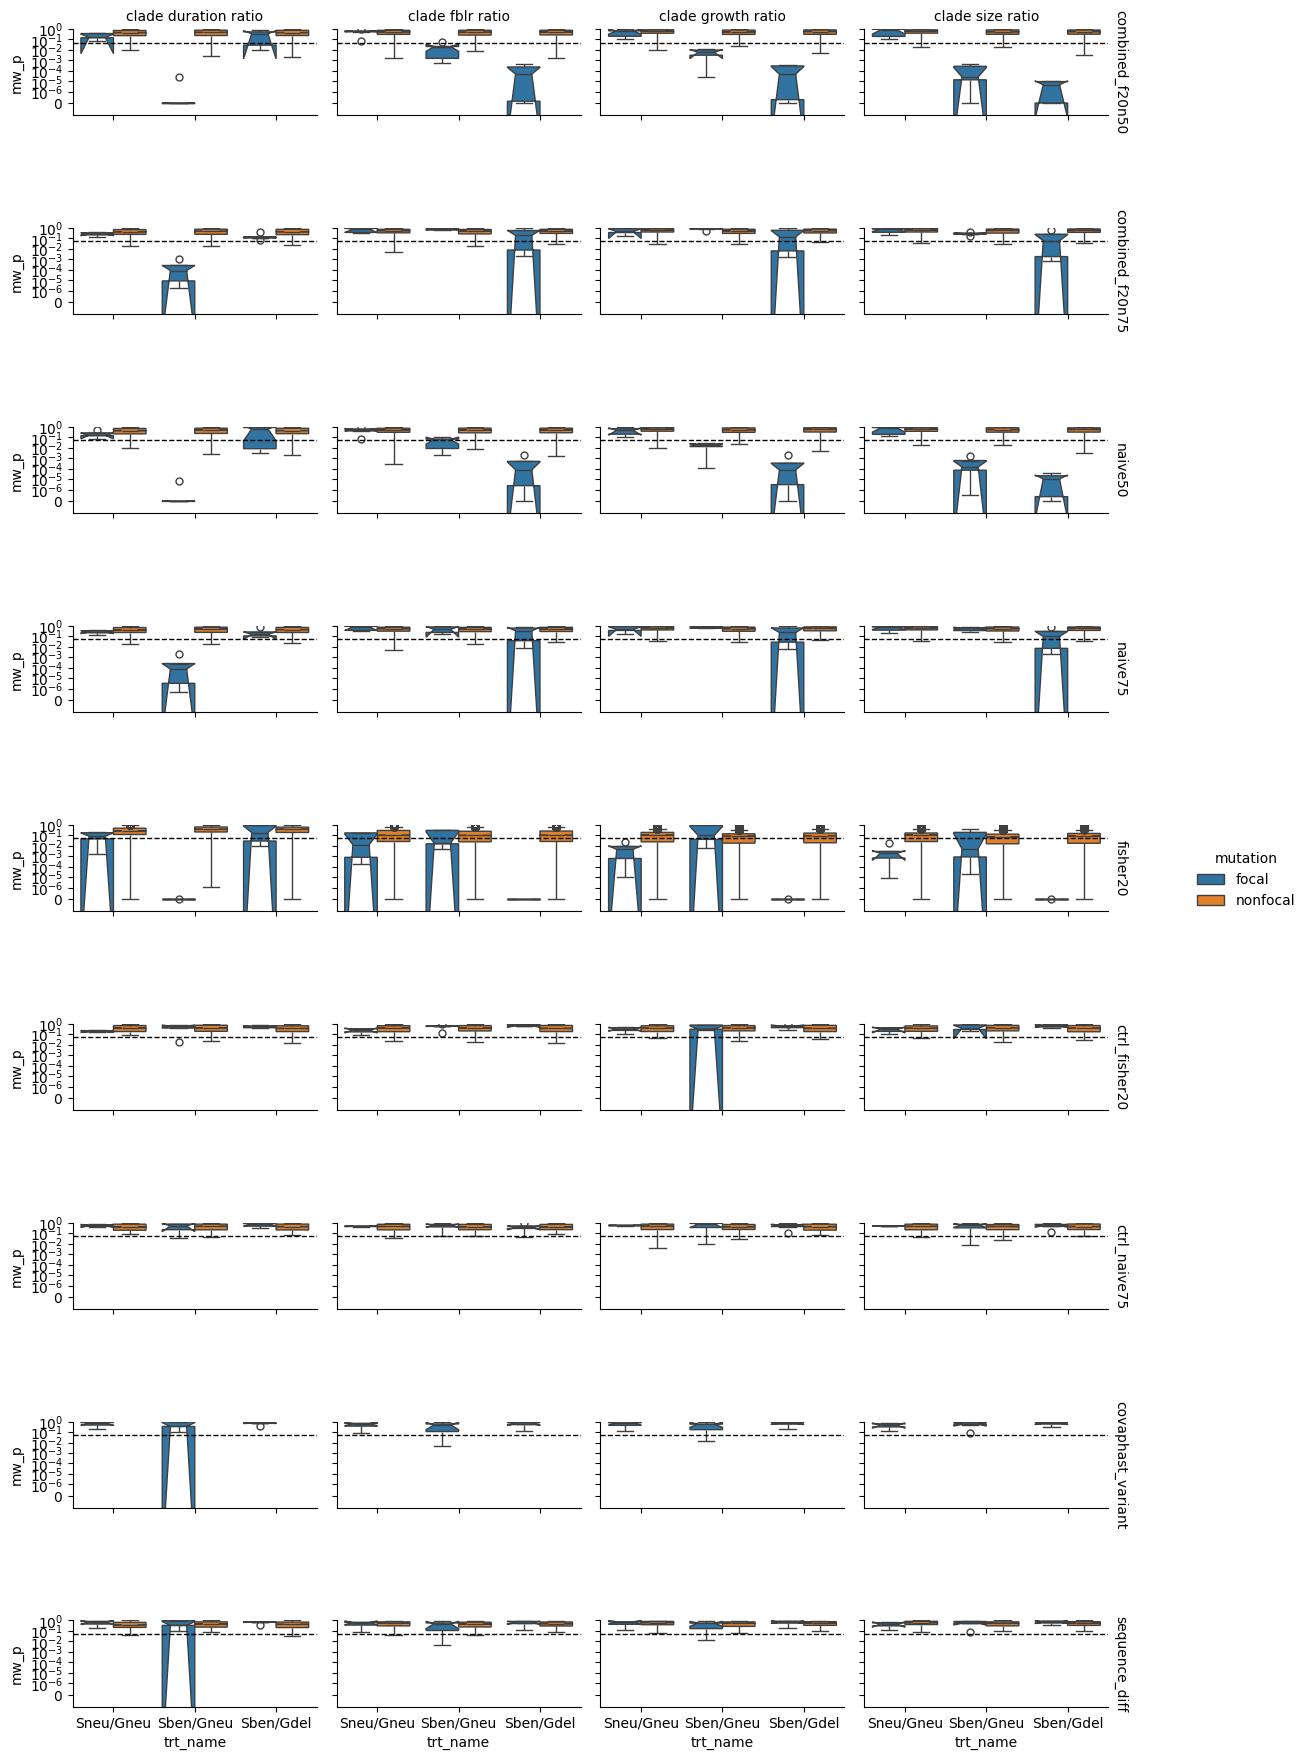

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


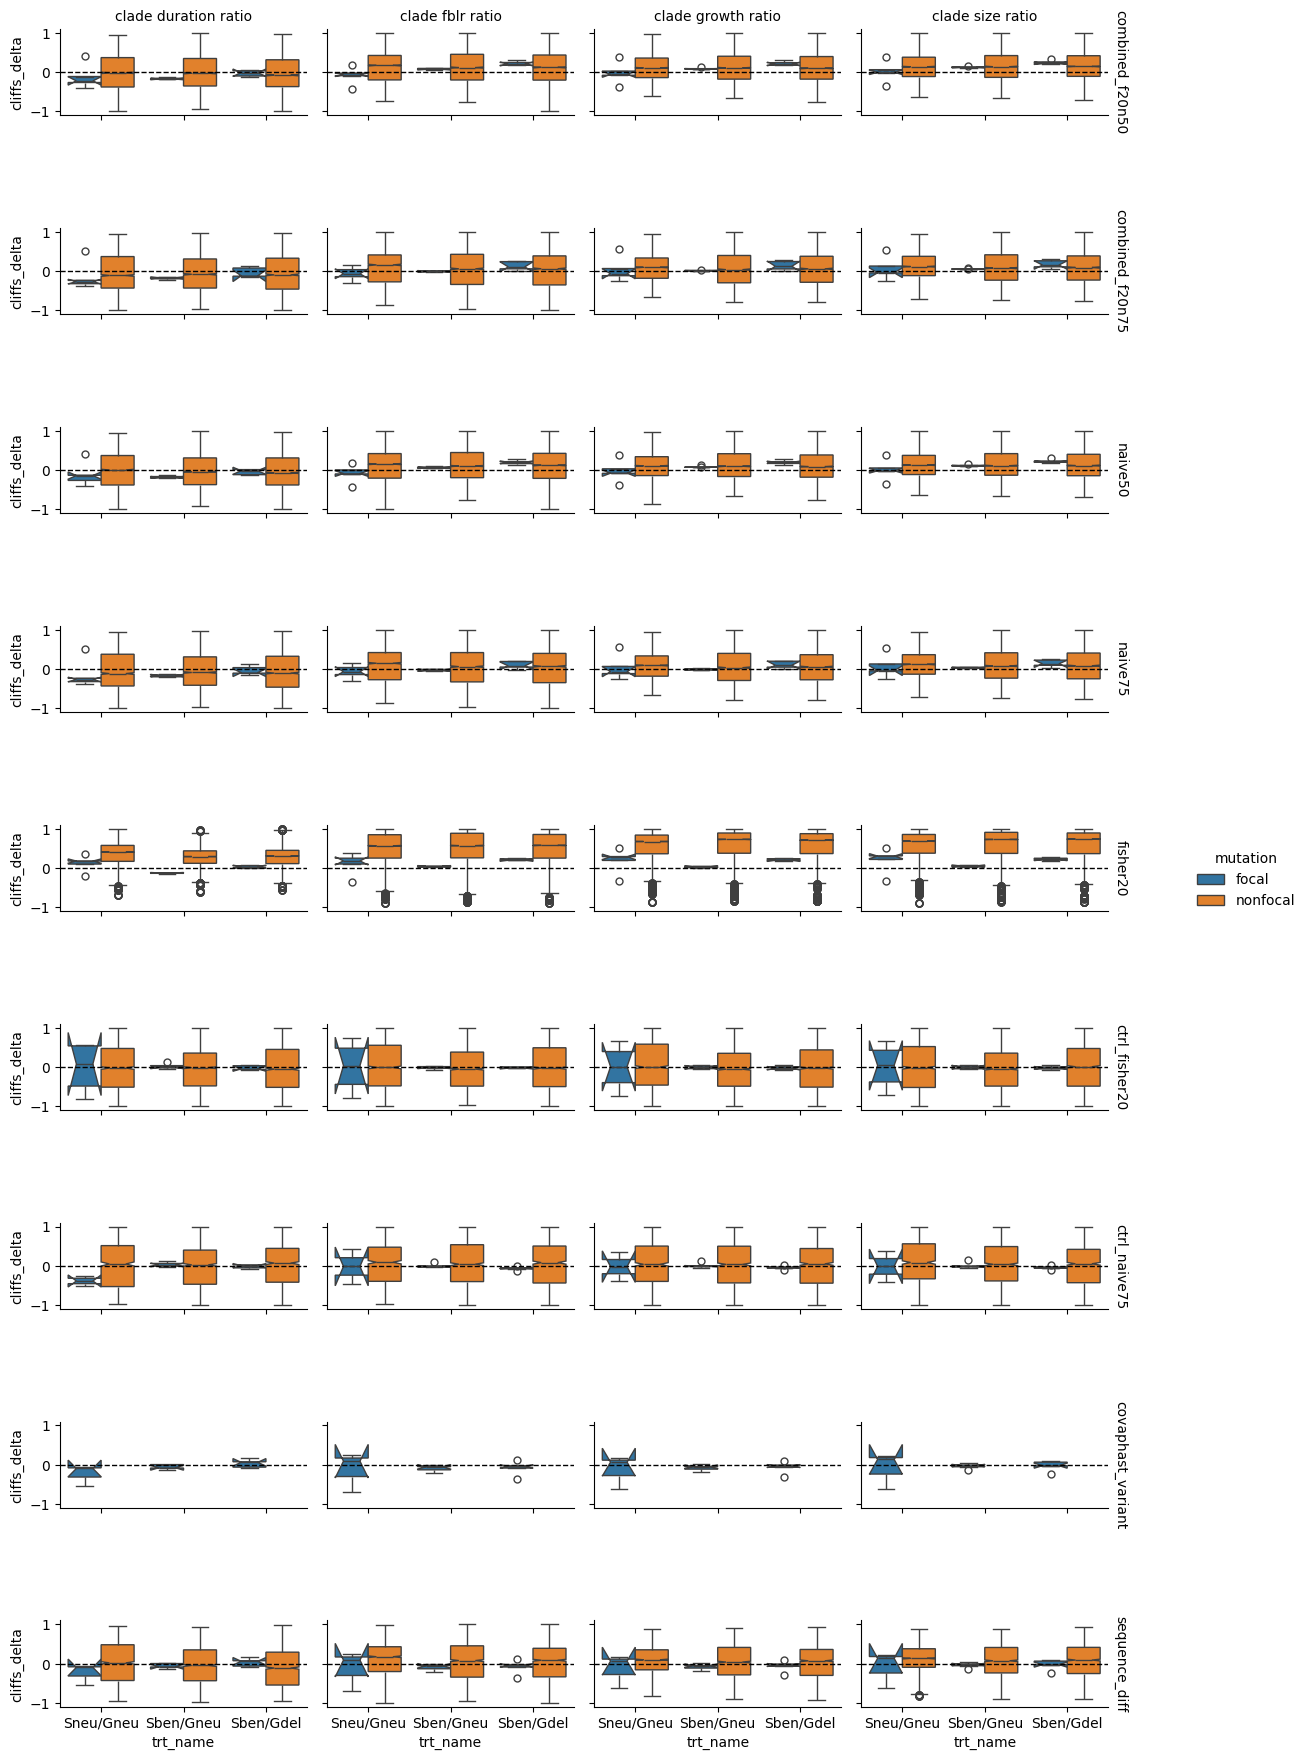

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


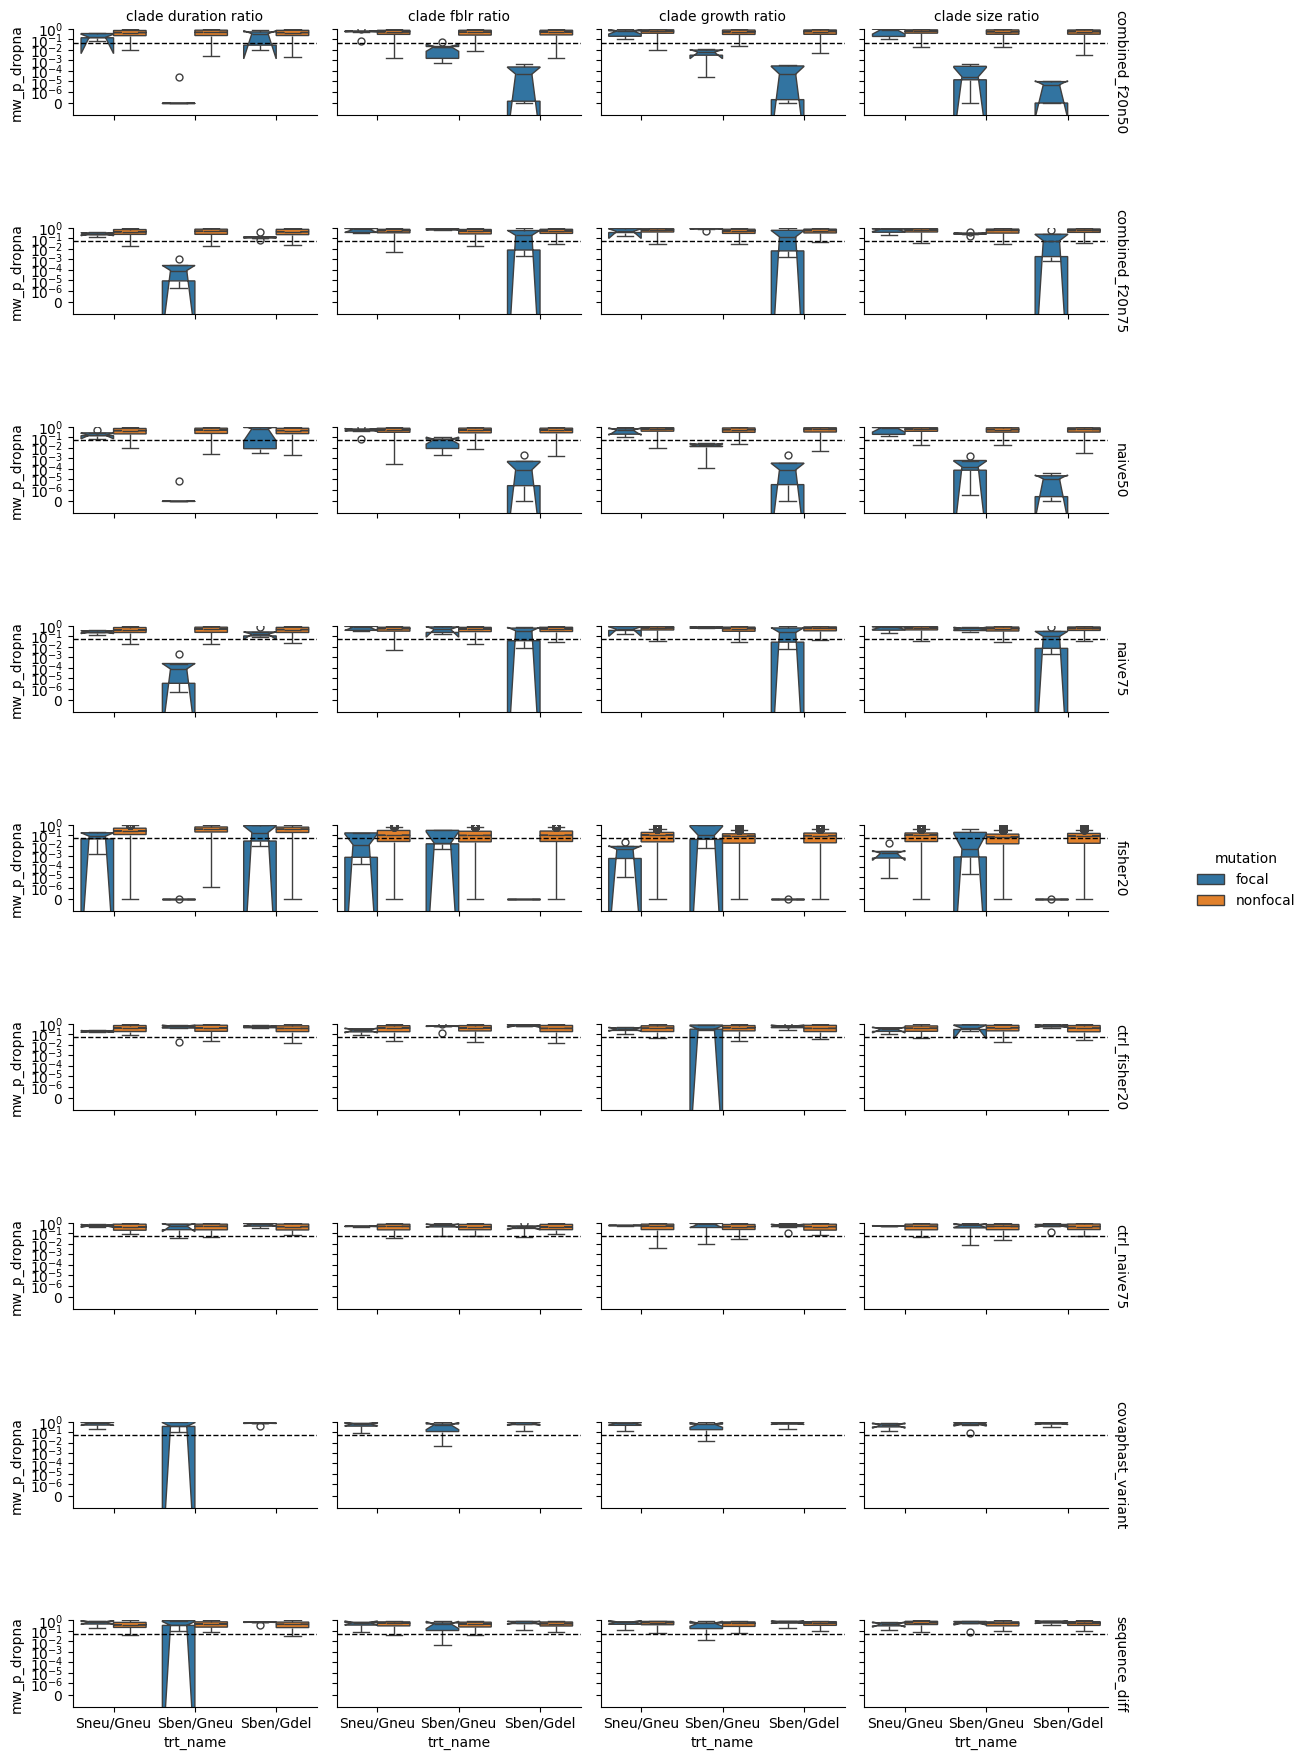

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


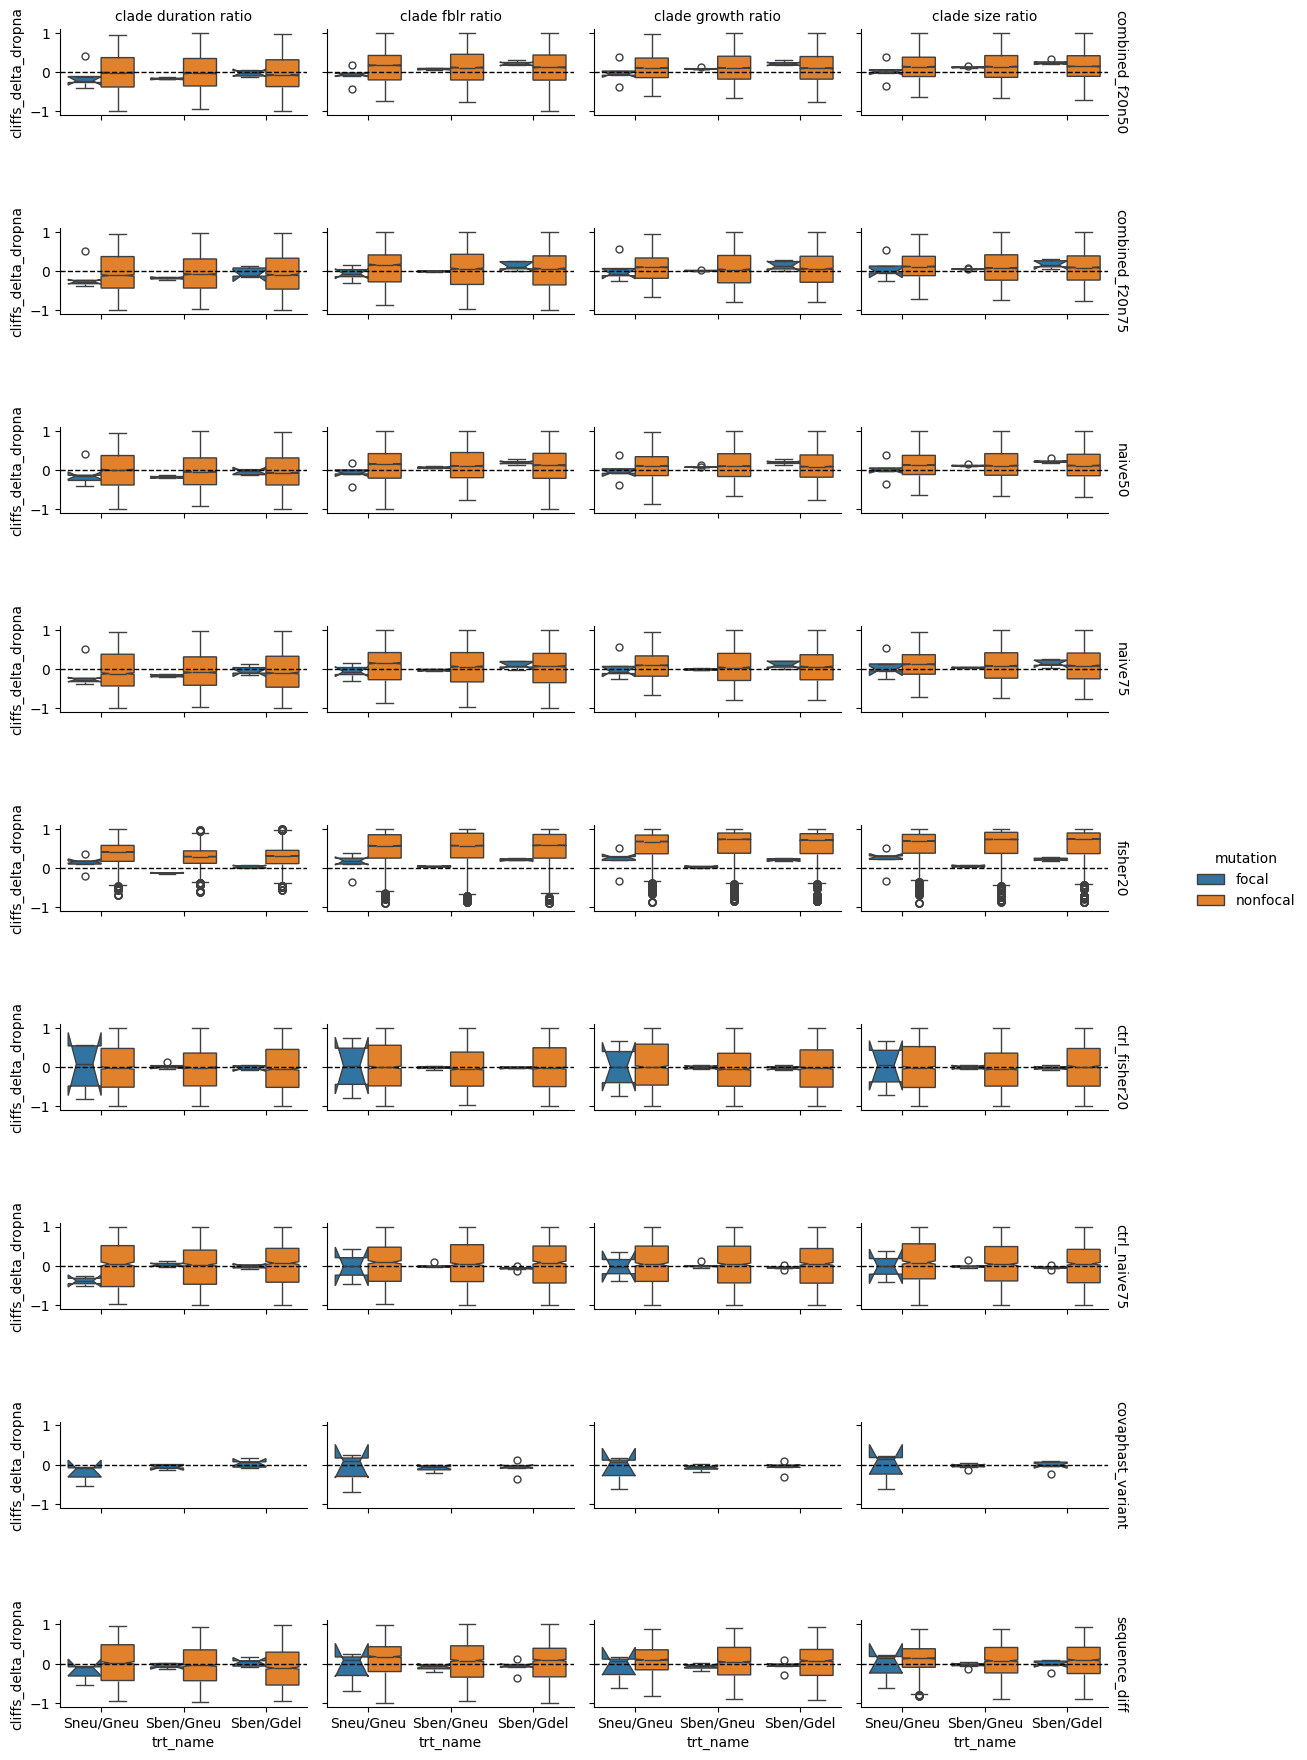

In [13]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for stat in stats:
        display(HTML(f"<h3>{stat} {min_leaves=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp,
            x="trt_name",
            y=stat,
            hue="mutation",
            row="screen_name",
            col="tb_stat",
            kind="box",
            aspect=1.5,
            height=2,
            notch=True,
            margin_titles=True,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.set(
                ylim={
                    "binom_p": (-1e-6, 1),
                    "binom_stat": (-0.05, 1.05),
                    "trinom_p": (-1e-6, 1),
                    "trinom_stat": (-1.1, 1.1),
                    "trinom_p_fill0": (-1e-6, 1),
                    "trinom_stat_fill0": (-1, 1),
                    "mw_p": (-1e-6, 1),
                    "cliffs_delta": (-1.1, 1.1),
                    "mw_p_dropna": (-1e-6, 1),
                    "cliffs_delta_dropna": (-1.1, 1.1),
                }[stat],
            )
            if "_p" not in stat:
                teed.map(
                    plt.axhline,
                    y={
                        "binom_stat": 0.5,
                        "trinom_stat": 0,
                        "trinom_stat_fill0": 0,
                        "cliffs_delta": 0,
                        "cliffs_delta_dropna": 0,
                    }[stat],
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )
            else:
                for ax in teed.axes.flatten():
                    ax.set_yscale("symlog", linthresh=1e-6)

                teed.map(
                    plt.axhline,
                    y=0.05,
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )


In [14]:
stats = (
    "screened_nanmax",
    "screened_nanmean",
    "screened_nanmedian",
    "mut_nobs",
    "binom_n",
    "beq_nanmax",
    "beq_nanmean",
    "screened_frac0",
    "screened_frac1",
    "screened_frac2",
    "screened_frac3",
)


In [15]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"] == "num_leaves")
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=100, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 270/270 [00:02<00:00, 117.33it/s]


In [16]:
data = pd.DataFrame(records)


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.png


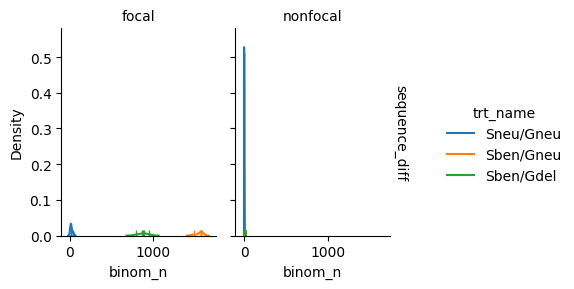

In [17]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="binom_n",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        # log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.png


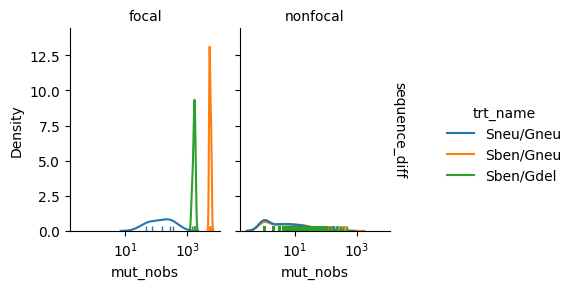

In [18]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="mut_nobs",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


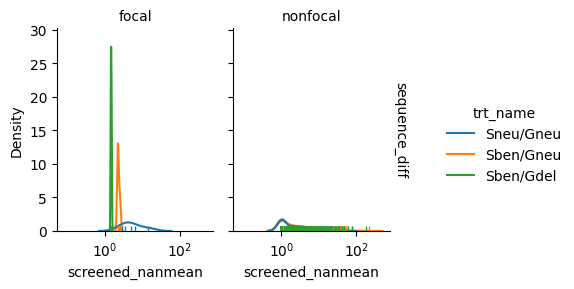

In [19]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.png


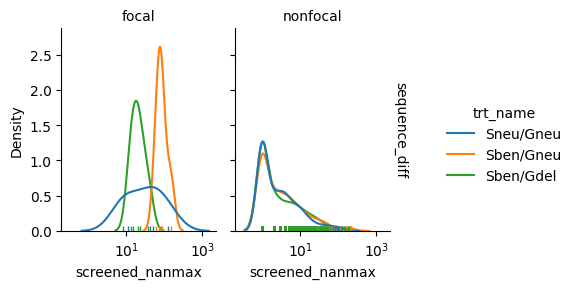

In [20]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.png


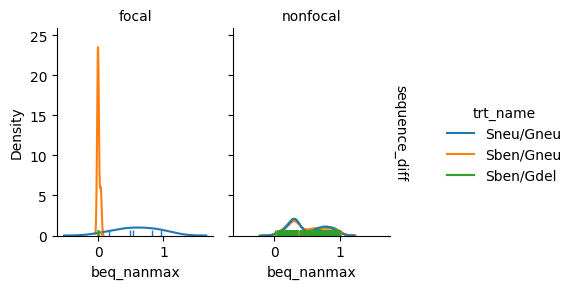

In [21]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.png


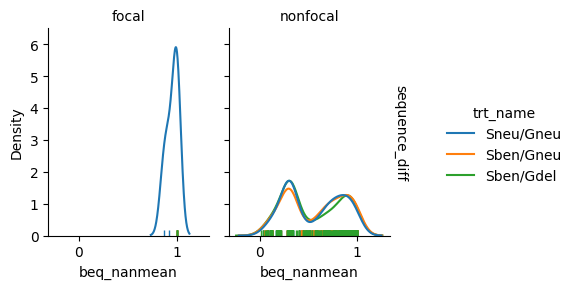

In [22]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


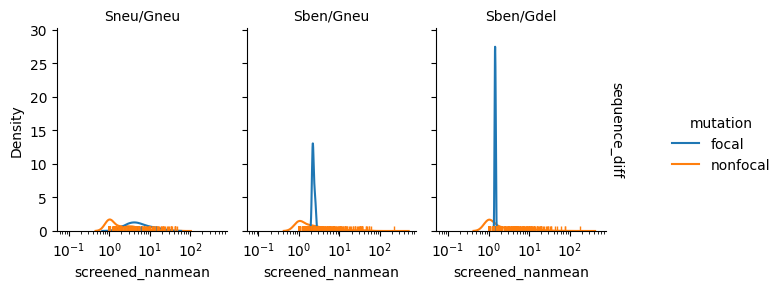

In [23]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.png


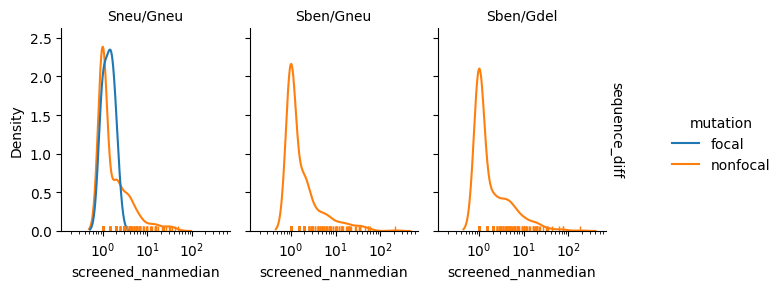

In [24]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmedian",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.png


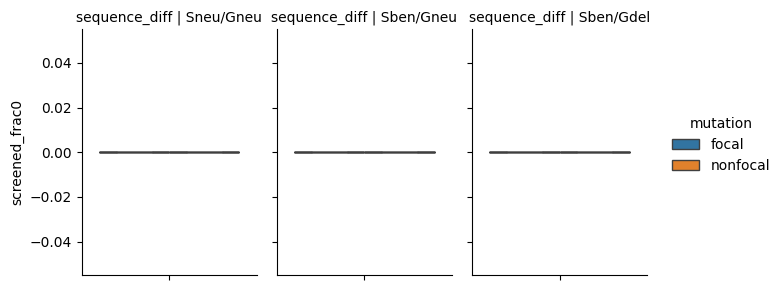

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.png


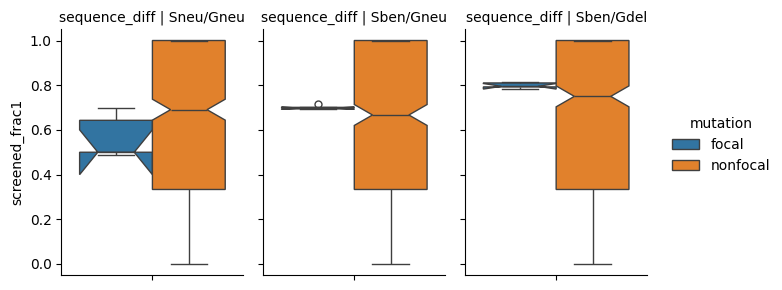

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.png


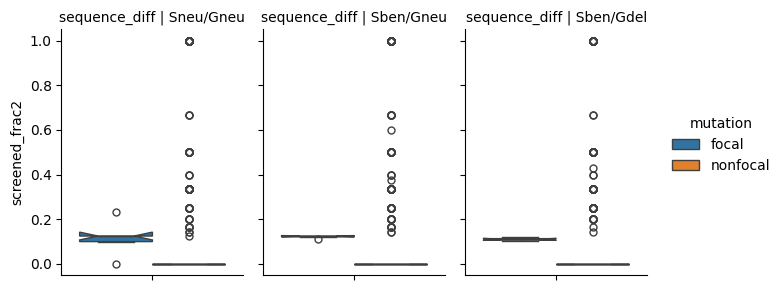

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.png


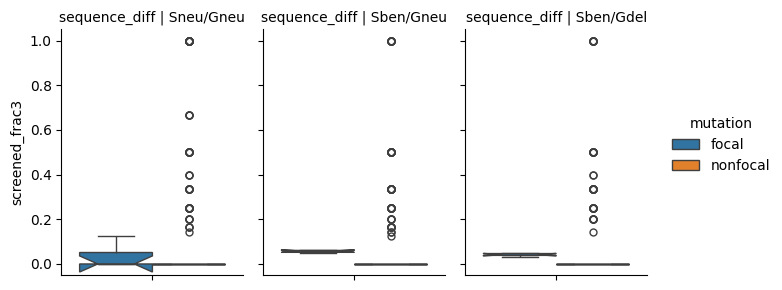

In [25]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for n in range(4):
        display(HTML(f"<h3>{min_leaves=} {n=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp[
                (grp["tb_stat"] == "num_leaves")
                & (grp["screen_name"] == "sequence_diff")
            ],
            y=f"screened_frac{n}",
            hue="mutation",
            row="screen_name",
            col="trt_name",
            kind="box",
            notch=True,
            aspect=0.75,
            height=3,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.tight_layout()
    break


In [26]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
69525       3752  0.044699     1117      543  3.693928e-01  8.911827e-01   
713681      5245  0.061969      157       98  2.317474e-03  2.558109e-04   
747543      3410  0.040770      145       68  5.065964e-01  8.190879e-01   
34406       6020  0.070874     1629     1050  9.199555e-32  9.325830e-22   
812128      3446  0.040971      752      364  4.016399e-01  5.534315e-01   
842742      5761  0.067981      735      401  1.485848e-02  1.407298e-01   
713691      5245  0.061969      160       70  1.328225e-01  2.105645e-01   
100171      5297  0.062300       52       27  8.898840e-01  9.688926e-01   
713725      5245  0.061969      151       80  5.151625e-01  3.034966e-01   
100221      5297  0.062300      148       75  9.345250e-01  8.382587e-01   
134017      3434  0.040869       71       26  3.192716e-02  1.259292e-01   
842739      5761  0.067981      143       71  1.000000e+00  3.647364e-01   
876522      3664  0.043752      198       90  2.269056e-01  2.829320e-01   
876527      3664  0.043752     7066     3533  1.000000e+00           NaN   
69509       3752  0.044699     1177      575  4.485525e-01  5.729626e-01   
777159      5321  0.062520       49       32  4.438416e-02  1.114740e-01   
777194      5321  0.062520      720      398  5.153210e-03  1.851272e-01   
34420       6020  0.070874     3048     2494  0.000000e+00  0.000000e+00   
34413       6020  0.070874       55       34  1.047895e-01  9.122425e-02   
747555      3410  0.040770       85       44  8.284233e-01  6.137850e-01   
133995      3434  0.040869       99       49  1.000000e+00  9.078639e-01   
876516      3664  0.043752     3730     1922  6.426701e-02  2.303288e-04   
69476       3752  0.044699      653      348  1.001878e-01  1.110260e-02   
777162      5321  0.062520      734      430  3.753686e-06  7.063837e-06   
134049      3434  0.040869       57       20  3.314397e-02  1.553891e-02   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
69525       clade size ratio        1180  Sben/Gneu             0   
713681  clade duration ratio         159  Sben/Gneu             0   
747543      clade fblr ratio         148  Sben/Gneu             0   
34406   clade duration ratio        1649  Sben/Gneu             0   
812128    clade growth ratio         816  Sben/Gneu             0   
842742      clade size ratio        1567  Sben/Gneu             0   
713691  clade duration ratio         161  Sben/Gneu             0   
100171  clade duration ratio          53  Sben/Gneu             0   
713725    clade growth ratio         151  Sben/Gneu             0   
100221      clade size ratio         152  Sben/Gneu             0   
134017      clade fblr ratio          72  Sben/Gneu             0   
842739      clade size ratio         146  Sben/Gneu             0   
876522  clade duration ratio         369  Sben/Gneu             0   
876527  clade duration ratio       20222  Sben/Gneu             0   
69509     clade growth ratio        1180  Sben/Gneu             0   
777159      clade fblr ratio          49  Sben/Gneu             0   
777194      clade size ratio        1571  Sben/Gneu             0   
34420       clade fblr ratio        3053  Sben/Gneu             0   
34413   clade duration ratio          58  Sben/Gneu             0   
747555    clade growth ratio          90  Sben/Gneu             0   
133995  clade duration ratio         213  Sben/Gneu             0   
876516  clade duration ratio        5592  Sben/Gneu             0   
69476   clade duration ratio        1470  Sben/Gneu             0   
777162    clade growth ratio         736  Sben/Gneu             0   
134049      clade size ratio          72  Sben/Gneu             0   

        screened_nanmean  
69525           0.059305  
713681          0.215817  
747543         -0.000094  
34406                inf  
812128         -0.000457  
842742          0.077450  
713691         -0.058460  
100171          0.00

In [27]:
df.loc[
    (df["trt_name"] == "Sneu/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k   binom_p  mw_p_dropna  \
940112        86  0.001028       68       24  0.020527     0.000195   
360509       190  0.002276        2        1  1.000000     0.820344   
23           341  0.004037       22       12  0.831812     0.401950   
292614        72  0.000855       16       11  0.210114     0.000803   
906138       158  0.001867       14       10  0.179565     0.000537   
516827       280  0.003314        4        3  0.625000     0.259340   
906151       158  0.001867        2        0  0.500000     0.339299   
328852        44  0.000529    17913    10190  0.000000     0.000000   
553728       145  0.001737       31       15  1.000000     0.870290   
516826       280  0.003314        9        8  0.039062     0.033253   
553715       145  0.001737       13        8  0.581055     0.298750   
940118        86  0.001028    19910    11197  0.000000     0.000000   
906129       158  0.001867        2        0  0.500000     0.214388   
906187       158  0.001867        2        0  0.500000     0.404195   
39           341  0.004037       13        8  0.581055     0.449841   
940074        86  0.001028        5        2  1.000000     0.659730   
69           341  0.004037        9        3  0.507812     0.483921   
940108        86  0.001028      109       54  1.000000     0.346787   
487373        27  0.000322        1        1  1.000000     0.273213   
453652        46  0.000542        2        1  1.000000     0.789452   
14           341  0.004037       38       18  0.871415     0.161057   
2            341  0.004037       22       13  0.523467     0.542179   
906135       158  0.001867        0        0       NaN          NaN   
328836        44  0.000529    19497    10951  0.000000     0.000000   
487375        27  0.000322    12918     6459  1.000000          NaN   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
940112    clade growth ratio          70  Sneu/Gneu             0   
360509      clade size ratio           2  Sneu/Gneu             0   
23          clade fblr ratio          22  Sneu/Gneu             0   
292614  clade duration ratio          16  Sneu/Gneu             0   
906138  clade duration ratio          14  Sneu/Gneu             0   
516827  clade duration ratio           4  Sneu/Gneu             0   
906151      clade fblr ratio           2  Sneu/Gneu             0   
328852      clade size ratio       19752  Sneu/Gneu             0   
553728    clade growth ratio          34  Sneu/Gneu             0   
516826  clade duration ratio           9  Sneu/Gneu             0   
553715      clade fblr ratio          13  Sneu/Gneu             0   
940118    clade growth ratio       20186  Sneu/Gneu             0   
906129  clade duration ratio           2  Sneu/Gneu             0   
906187      clade size ratio           2  Sneu/Gneu             0   
39        clade growth ratio          13  Sneu/Gneu             0   
940074  clade duration ratio          10  Sneu/Gneu             0   
69          clade size ratio           9  Sneu/Gneu             0   
940108    clade growth ratio         133  Sneu/Gneu             0   
487373      clade size ratio           1  Sneu/Gneu             0   
453652      clade size ratio           2  Sneu/Gneu             0   
14      clade duration ratio          39  Sneu/Gneu             0   
2       clade duration ratio          22  Sneu/Gneu             0   
906135  clade duration ratio           0  Sneu/Gneu             0   
328836    clade growth ratio       19752  Sneu/Gneu             0   
487375      clade size ratio       14008  Sneu/Gneu             0   

        screened_nanmean  
940112     -1.580682e-02  
360509      1.579265e-01  
23          6.425513e-03  
292614               inf  
906138               inf  
516827      3.624642e-01  
906151     -1.995722e-02  
328852      1.814048e-01  
553728     -2.505351e-02  
516826      1.278422e+00  
553715      1.086766e-02  
940118      5.867272e-03  
906129     -5.5